In [1]:
def merc_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(12,12))
        m       = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=lat[-1],\
                  llcrnrlon=150.,urcrnrlon=270.,lat_ts=-60,resolution='c')
        #m       = Basemap(llcrnrlon=lon[0],llcrnrlat=-70.,urcrnrlon=lon[-1],urcrnrlat=lat[-1],\
        #          rsphere=(6378137.00,6356752.3142),\
        #          resolution='l',area_thresh=1000.,projection='lcc',\
        #          lat_1=-70.,lon_0=-185.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-30.,10), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(150.,270.,10), labels=[0, 0, 0, 1])
        m.drawcoastlines()



        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

In [2]:
def lambert_map(cbar_levels, X, Y, data, title, title_colorbar, cmap, path_save, title_save):
        '''
        Function for plotting a lambert projection map.
        
        Args : 
        cbar_levels, X, Y, data, title, title_colorbar, path_save, title_save
        '''
        import matplotlib.pyplot as plt
        import numpy as np
        from mpl_toolkits.basemap import Basemap
        
        v       = cbar_levels
        fig     = plt.figure(figsize=(8,8))
        m       = Basemap(llcrnrlon=162.,llcrnrlat=-79.,urcrnrlon=230.,urcrnrlat=-68.,\
                  rsphere=(6378137.00,6356752.3142),\
                  resolution='l',area_thresh=1000.,projection='lcc',\
                  lat_1=65.,lon_0=180.)
        xm, ym  = m(X, Y)
        im      = m.contourf(xm, ym, data, levels=v, extend='both', cmap=cmap)

        cbar = m.colorbar(im,pad='10%')
        cbar.set_label(title_colorbar, fontsize =16)

        m.fillcontinents(color='0.5', lake_color='0.5')
        m.drawparallels(np.arange(-80.,-60.,5), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(160.,210.,5), labels=[0, 0, 0, 1])
        m.drawcoastlines()



        plt.title(title, fontsize=18)
        plt.savefig(path_save + title_save, bbox_inches='tight')

In [3]:
def annual_mean(field, depth, type_map, title, title_colorbar, cmap, path_save, title_save):
    
    
    T1   = file1.variables[field][:,depth,:200,:]
    T2   = file2.variables[field][:,depth,:200,:]
    T3   = file3.variables[field][:,depth,:200,:]
    T4   = file4.variables[field][:,depth,:200,:]
    T5   = file5.variables[field][:,depth,:200,:]
    T6   = file6.variables[field][:,depth,:200,:]
    T7   = file7.variables[field][:,depth,:200,:]
    T8   = file8.variables[field][:,depth,:200,:]
    T9   = file9.variables[field][:,depth,:200,:]
    T10 = file10.variables[field][:,depth,:200,:]
    T11 = file11.variables[field][:,depth,:200,:]
    T12 = file12.variables[field][:,depth,:200,:]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12
    
    # Change lons from -180-180 to 0-360
    T_new = np.ma.masked_all((len(lat), len(lon)))
    
    for i in range(720):
        T_new[:,i]=T[:,i+720]
        
    for i in range(720):
        T_new[:,i+720]=T[:,i]
        
    print('Temperature min, max, mean :', T_new.min(), T_new.max(), np.mean(T_new))
    
    field_min = T_new.min()
    field_max = T_new.max()
    cbar_levels = np.linspace(field_min, field_max, 50)
    
    type_map(cbar_levels, LON_new, LAT, T_new, title, title_colorbar, cmap, path_save, title_save)

In [4]:
def seasonal_mean(ind, field, depth, type_map, title, title_colorbar, cmap, path_save, title_save):
    
    if ind==1:
        T1   = file1.variables[field][:,depth,:200,:]
        T2   = file2.variables[field][:,depth,:200,:]
        T12 = file12.variables[field][:,depth,:200,:]
        
        T1 = np.squeeze(T1)
        T2 = np.squeeze(T2)
        T12 = np.squeeze(T12)
        
        T = (T1 + T2 + T12)/3
    else:
        T6   = file6.variables['salinity'][:,depth,:200,:]
        T7   = file7.variables['salinity'][:,depth,:200,:]
        T8   = file8.variables['salinity'][:,depth,:200,:]
        
        T6 = np.squeeze(T6)
        T7 = np.squeeze(T7)
        T8 = np.squeeze(T8)
        
        T = (T6 + T7 + T8)/3
            
    # Change lons from -180-180 to 0-360
    T_new = np.ma.masked_all((len(lat), len(lon)))
    
    for i in range(720):
        T_new[:,i]=T[:,i+720]
        
    for i in range(720):
        T_new[:,i+720]=T[:,i]    
        
    print('Temperature min, max, mean :', T_new.min(), T_new.max(), np.mean(T_new))
    
    field_min = T_new.min()
    field_max = T_new.max()
    cbar_levels = np.linspace(field_min, field_max, 50)

    type_map(cbar_levels, LON_new, LAT, T_new, title, title_colorbar, cmap, path_save, title_save)

In [5]:
def annual_diff(IND, cbar_levels, field, depth, mean_Field, title, title_colorbar, cmap, path_save, title_save):
    
    T1   = file1.variables[field][:,depth,:200,:]
    T2   = file2.variables[field][:,depth,:200,:]
    T3   = file3.variables[field][:,depth,:200,:]
    T4   = file4.variables[field][:,depth,:200,:]
    T5   = file5.variables[field][:,depth,:200,:]
    T6   = file6.variables[field][:,depth,:200,:]
    T7   = file7.variables[field][:,depth,:200,:]
    T8   = file8.variables[field][:,depth,:200,:]
    T9   = file9.variables[field][:,depth,:200,:]
    T10 = file10.variables[field][:,depth,:200,:]
    T11 = file11.variables[field][:,depth,:200,:]
    T12 = file12.variables[field][:,depth,:200,:]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12
    
    # Change lons from -180-180 to 0-360
    T_new = np.ma.masked_all((len(lat), len(lon)))
    
    for i in range(720):
        T_new[:,i]=T[:,i+720]
        
    for i in range(720):
        T_new[:,i+720]=T[:,i]    
    
    mean_Field = pickle_load(mean_Field, '/data/ebent')
    nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
    
    if IND==1:
        lon_min = 1800
        lon_max = 3240
        lat_min = 0
        lat_max = 1170
    else:
        lon_min = 1950
        lon_max = 2520
        lat_min = 0
        lat_max = 541
        
    y = nc.variables['lat'][lat_min:lat_max]
    x = nc.variables['lon'][lon_min:lon_max]
    mean_Field = interpolate.interp2d(x, y, mean_Field, kind='linear')(lon_new, lat)
    
    Diff = T_new-mean_Field
    print('Diff min, max, mean :', Diff.min(), Diff.max(), np.mean(Diff))
    
    if IND==1:
        merc_map(cbar_levels, LON_new, LAT, Diff, title, title_colorbar, cmap, path_save, title_save)
        
    else:
        lambert_map(cbar_levels, LON_new, LAT, Diff, title, title_colorbar, cmap, path_save, title_save)

In [6]:
def seasonal_diff(ind, IND, cbar_levels, field, depth, mean_Field, title, title_colorbar, cmap, path_save, title_save):
    
    if ind==1:
        T1   = file1.variables[field][:,depth,:200,:]
        T2   = file2.variables[field][:,depth,:200,:]
        T12 = file12.variables[field][:,depth,:200,:]
        
        T1 = np.squeeze(T1)
        T2 = np.squeeze(T2)
        T12 = np.squeeze(T12)
        
        T = (T1 + T2 + T12)/3
    else:
        T6   = file6.variables['salinity'][:,depth,:200,:]
        T7   = file7.variables['salinity'][:,depth,:200,:]
        T8   = file8.variables['salinity'][:,depth,:200,:]
        
        T6 = np.squeeze(T6)
        T7 = np.squeeze(T7)
        T8 = np.squeeze(T8)
        
        T = (T6 + T7 + T8)/3
            
    # Change lons from -180-180 to 0-360
    T_new = np.ma.masked_all((len(lat), len(lon)))
    
    for i in range(720):
        T_new[:,i]=T[:,i+720]
        
    for i in range(720):
        T_new[:,i+720]=T[:,i]    
    
    mean_Field = pickle_load(mean_Field, '/data/ebent')
    nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
    
    if IND==1:
        lon_min = 1800
        lon_max = 3240
        lat_min = 0
        lat_max = 1170
    else:
        lon_min = 1950
        lon_max = 2520
        lat_min = 0
        lat_max = 541
        
    y = nc.variables['lat'][lat_min:lat_max]
    x = nc.variables['lon'][lon_min:lon_max]
    mean_Field = interpolate.interp2d(x, y, mean_Field, kind='linear')(lon_new, lat)
    
    Diff = T_new-mean_Field
    print('Diff min, max, mean :', Diff.min(), Diff.max(), np.mean(Diff))
    
    if IND==1:
        merc_map(cbar_levels, LON_new, LAT, Diff, title, title_colorbar, cmap, path_save, title_save)
        
    else:
        lambert_map(cbar_levels, LON_new, LAT, Diff, title, title_colorbar, cmap, path_save, title_save)

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from scipy import interpolate
import os
import pickle
import cmocean
from func_pickle import *

load_path = '/project_shared/WAGHC/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
plot_path = '/home/ebent/plots/climatology'

***

# Read files and variables

In [8]:
file1 = Dataset(load_path+'WAGHC_PYC_01_UHAM-ICDC_v1_0.nc', 'r')
file2 = Dataset(load_path+'WAGHC_PYC_02_UHAM-ICDC_v1_0.nc', 'r')
file3 = Dataset(load_path+'WAGHC_PYC_03_UHAM-ICDC_v1_0.nc', 'r')
file4 = Dataset(load_path+'WAGHC_PYC_04_UHAM-ICDC_v1_0.nc', 'r')
file5 = Dataset(load_path+'WAGHC_PYC_05_UHAM-ICDC_v1_0.nc', 'r')
file6 = Dataset(load_path+'WAGHC_PYC_06_UHAM-ICDC_v1_0.nc', 'r')
file7 = Dataset(load_path+'WAGHC_PYC_07_UHAM-ICDC_v1_0.nc', 'r')
file8 = Dataset(load_path+'WAGHC_PYC_08_UHAM-ICDC_v1_0.nc', 'r')
file9 = Dataset(load_path+'WAGHC_PYC_09_UHAM-ICDC_v1_0.nc', 'r')
file10 = Dataset(load_path+'WAGHC_PYC_10_UHAM-ICDC_v1_0.nc', 'r')
file11 = Dataset(load_path+'WAGHC_PYC_11_UHAM-ICDC_v1_0.nc', 'r')
file12 = Dataset(load_path+'WAGHC_PYC_12_UHAM-ICDC_v1_0.nc', 'r')

In [9]:
lon = file1.variables['longitude'][:]
lat = file1.variables['latitude'][:200]
depth = file1.variables['depth'][:]
Lat, Depth = np.meshgrid(lat, depth)

In [10]:
depth2 = file2.variables['depth'][:]
print depth[-1], depth2[-1]

6650.0 6650.0


In [11]:
lon.shape, 

((1440,),)

In [12]:
lon_new = lon + 180
LON_new, LAT = np.meshgrid(lon_new, lat)

In [13]:
lon[120], lon[0]

(-150.0, -180.0)

# Salinity at 150W

In [27]:
S1 = file1.variables['salinity'][:,:,:200,120]
S2 = file2.variables['salinity'][:,:,:200,120]
S3 = file3.variables['salinity'][:,:,:200,120]
S4 = file4.variables['salinity'][:,:,:200,120]
S5 = file5.variables['salinity'][:,:,:200,120]
S6 = file6.variables['salinity'][:,:,:200,120]
S7 = file7.variables['salinity'][:,:,:200,120]
S8 = file8.variables['salinity'][:,:,:200,120]
S9 = file9.variables['salinity'][:,:,:200,120]
S10 = file10.variables['salinity'][:,:,:200,120]
S11 = file11.variables['salinity'][:,:,:200,120]
S12 = file12.variables['salinity'][:,:,:200,120]

S1 = np.squeeze(S1)
S2 = np.squeeze(S2)
S3 = np.squeeze(S3)
S4 = np.squeeze(S4)
S5 = np.squeeze(S5)
S6 = np.squeeze(S6)
S7 = np.squeeze(S7)
S8 = np.squeeze(S8)
S9 = np.squeeze(S9)
S10 = np.squeeze(S10)
S11 = np.squeeze(S11)
S12 = np.squeeze(S12)

In [28]:
S = (S1 + S2 + S3 + S4 + S5 + S6 + S7 + S8 + S9 + S10 + S11 + S12)/12

In [16]:
print(S.min(), S.max(), np.mean(S))

(33.826035, 35.529194, 34.539610239852401)


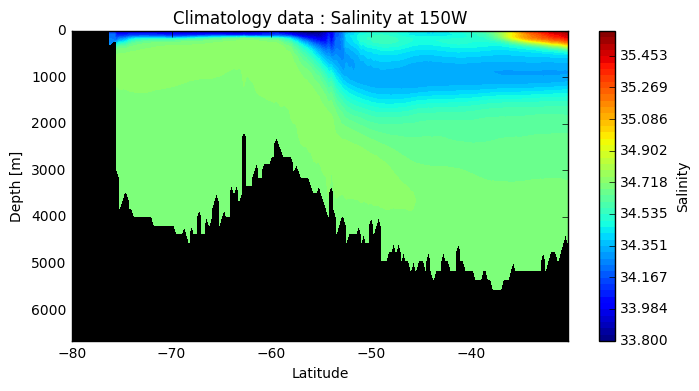

In [138]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')

plt.contourf(Lat, Depth, S, cmap='jet', levels=np.linspace(33.8,35.6,50)) #_r to invert it
plt.title('Climatology data : Salinity at 150W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'S_150.png', bbox_inches='tight')

#masked_array = S.mask
#masked_array = np.ma.array (S, mask=np.isnan(S))
#cmap = matplotlib.cm.jet
#cmap.set_bad('white',1.)
#ax.imshow(masked_array, interpolation='nearest', cmap=cmap)

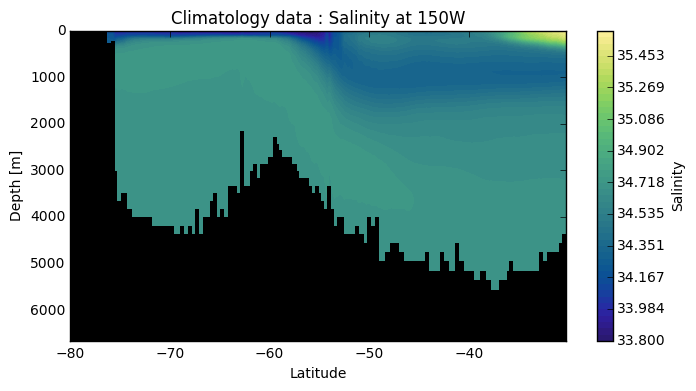

In [18]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')

plt.contourf(Lat, Depth, S, cmap=cmocean.cm.haline, levels=np.linspace(33.8,35.6,50)) #_r to invert it
plt.title('Climatology data : Salinity at 150W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'S_150.png', bbox_inches='tight')

#masked_array = S.mask
#masked_array = np.ma.array (S, mask=np.isnan(S))
#cmap = matplotlib.cm.jet
#cmap.set_bad('white',1.)
#ax.imshow(masked_array, interpolation='nearest', cmap=cmap)

# Salinity at 180W

In [33]:
S1 =   file1.variables['salinity'][:,:,:200,0]
S2 =   file2.variables['salinity'][:,:,:200,0]
S3 =   file3.variables['salinity'][:,:,:200,0]
S4 =   file4.variables['salinity'][:,:,:200,0]
S5 =   file5.variables['salinity'][:,:,:200,0]
S6 =   file6.variables['salinity'][:,:,:200,0]
S7 =   file7.variables['salinity'][:,:,:200,0]
S8 =   file8.variables['salinity'][:,:,:200,0]
S9 =   file9.variables['salinity'][:,:,:200,0]
S10 = file10.variables['salinity'][:,:,:200,0]
S11 = file11.variables['salinity'][:,:,:200,0]
S12 = file12.variables['salinity'][:,:,:200,0]

S1 = np.squeeze(S1)
S2 = np.squeeze(S2)
S3 = np.squeeze(S3)
S4 = np.squeeze(S4)
S5 = np.squeeze(S5)
S6 = np.squeeze(S6)
S7 = np.squeeze(S7)
S8 = np.squeeze(S8)
S9 = np.squeeze(S9)
S10 = np.squeeze(S10)
S11 = np.squeeze(S11)
S12 = np.squeeze(S12)

In [34]:
S = (S1 + S2 + S3 + S4 + S5 + S6 + S7 + S8 + S9 + S10 + S11 + S12)/12

In [21]:
print(S.min(), S.max(), np.mean(S))

(33.84943, 35.699429, 34.576615778053316)


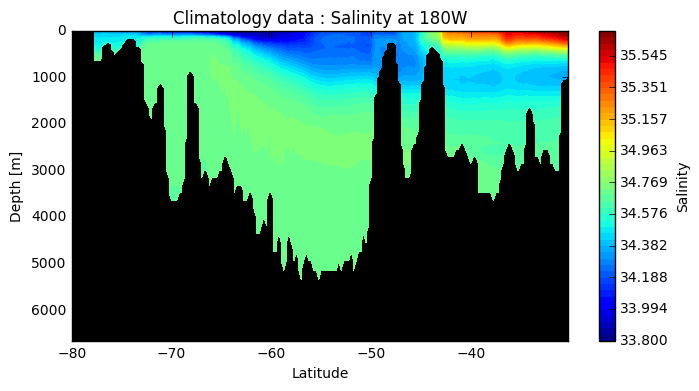

In [115]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')

plt.contourf(Lat, Depth, S, cmap='jet', levels=np.linspace(33.8,35.7,50)) #_r to invert it
plt.title('Climatology data : Salinity at 180W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'S_180.png', bbox_inches='tight')

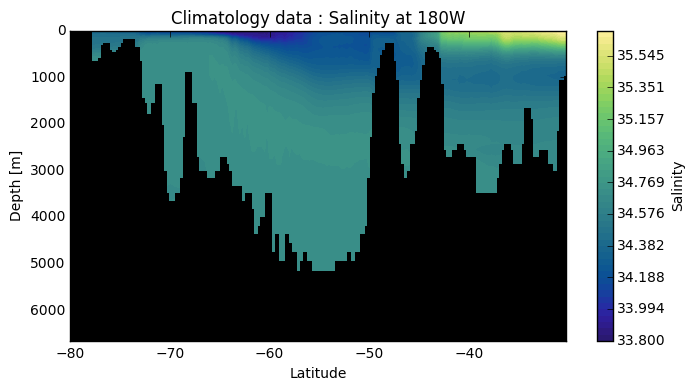

In [22]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')

plt.contourf(Lat, Depth, S, cmap=cmocean.cm.haline, levels=np.linspace(33.8,35.7,50)) #_r to invert it
plt.title('Climatology data : Salinity at 180W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'S_180.png', bbox_inches='tight')

# Differences

# 150W

In [171]:
mean_Salt_150W = pickle_load('mean_Salt_150W', '/data/ebent')
nc = Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

# Mercator boxe
LAT = nc.variables['lat'][0:1170]
DEPTH = nc.variables['depth'][:]    

minimum = S.min()
S_new = interpolate.interp2d(lat, depth, S, kind='linear')(LAT, DEPTH)
S_new = np.ma.masked_where(S_new<minimum, S_new)

Diff = S_new-mean_Salt_150W
print('Diff min, max, mean :', Diff.min(), Diff.max(), np.mean(Diff))

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('Diff min, max, mean :', -0.86050293343569, 1.5637229218514932, 0.06789839711527822)


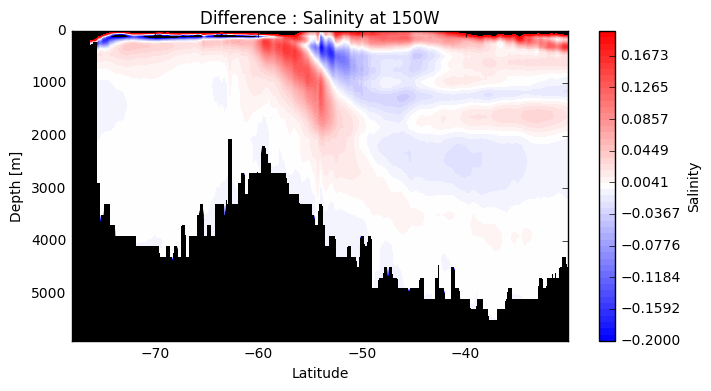

In [172]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')


plt.contourf(LAT, DEPTH, Diff, cmap='bwr', edgecolors = 'None', levels=np.linspace(-0.2,0.2,50)) #_r to invert it
plt.title('Difference : Salinity at 150W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'Diff_S_150.png', bbox_inches='tight')

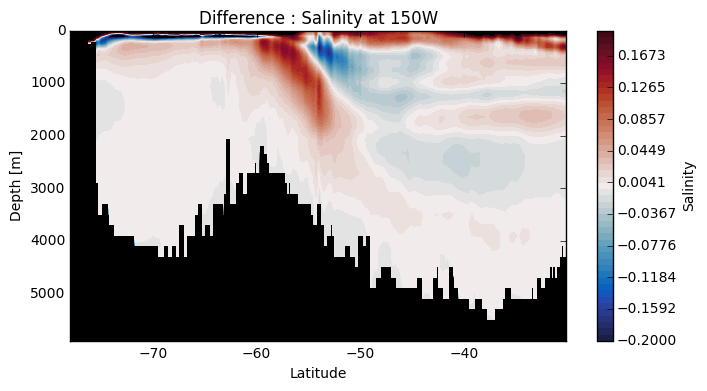

In [32]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')


plt.contourf(LAT, DEPTH, Diff, cmap=cmocean.cm.balance, edgecolors = 'None', levels=np.linspace(-0.2,0.2,50)) #_r to invert it
plt.title('Difference : Salinity at 150W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'Diff_S_150.png', bbox_inches='tight')

# 180W

In [175]:
mean_Salt_180W = pickle_load('mean_Salt_180W', '/data/ebent')
nc = Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')

# Mercator boxe
LAT = nc.variables['lat'][0:1170]
DEPTH = nc.variables['depth'][:]    

minimum = S.min()
S_new = interpolate.interp2d(lat, depth, S, kind='linear')(LAT, DEPTH)
S_new = np.ma.masked_where(S_new<minimum, S_new)

Diff = S_new-mean_Salt_180W
print('Diff min, max, mean :', Diff.min(), Diff.max(), np.mean(Diff))

('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('Diff min, max, mean :', -0.9384278421807295, 0.9028055391904957, 0.03579041132511266)


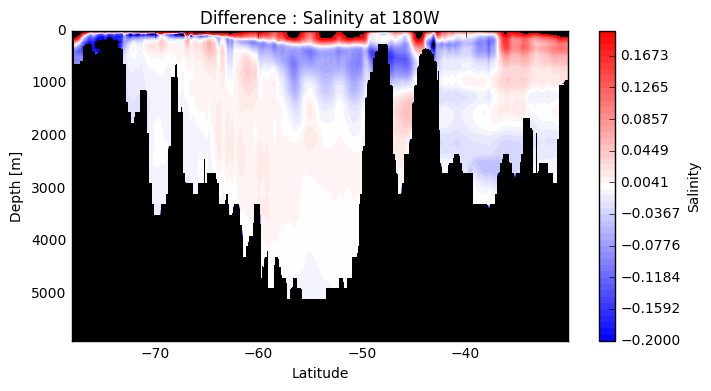

In [176]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')

plt.contourf(LAT, DEPTH, Diff, cmap='bwr', levels=np.linspace(-0.2,0.2,50)) #_r to invert it
plt.title('Difference : Salinity at 180W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'Diff_S_180.png', bbox_inches='tight')

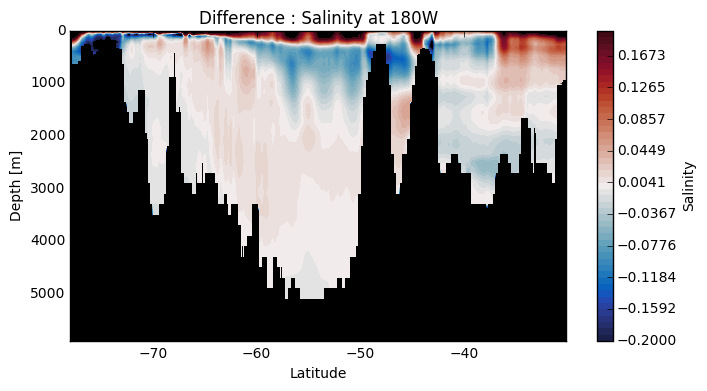

In [36]:
fig = plt.figure(figsize=(8,4), dpi=300)
fig.add_subplot(111,axisbg='k')

plt.contourf(LAT, DEPTH, Diff, cmap=cmocean.cm.balance, levels=np.linspace(-0.2,0.2,50)) #_r to invert it
plt.title('Difference : Salinity at 180W')
plt.xlabel('Latitude')
plt.ylabel('Depth [m]')

cb = plt.colorbar()
cb.set_label('Salinity')

plt.gca().invert_yaxis() #gca : get current axis
#plt.gca().invert_xaxis() 
plt.savefig(plot_path + 'Diff_S_180.png', bbox_inches='tight')

***

# Lat/Lon sections

## Mercator

('Temperature min, max, mean :', 18.886451721191406, 36.58958435058594, 34.35451755881114)
('Temperature min, max, mean :', 32.03492736816406, 36.643035888671875, 34.37571580805312)
('Temperature min, max, mean :', 33.22590637207031, 36.480499267578125, 34.433965092032786)
('Temperature min, max, mean :', 33.85647201538086, 35.870330810546875, 34.55899541301029)
('Temperature min, max, mean :', 34.057952880859375, 35.40282440185547, 34.538326690823574)


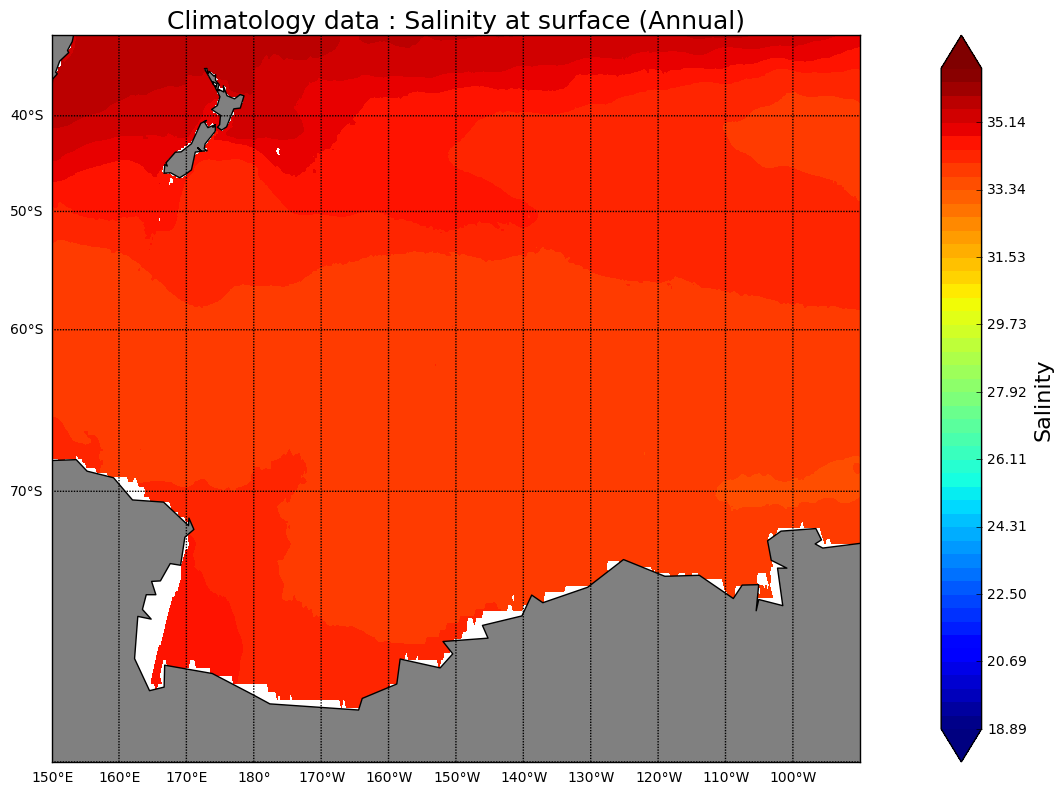

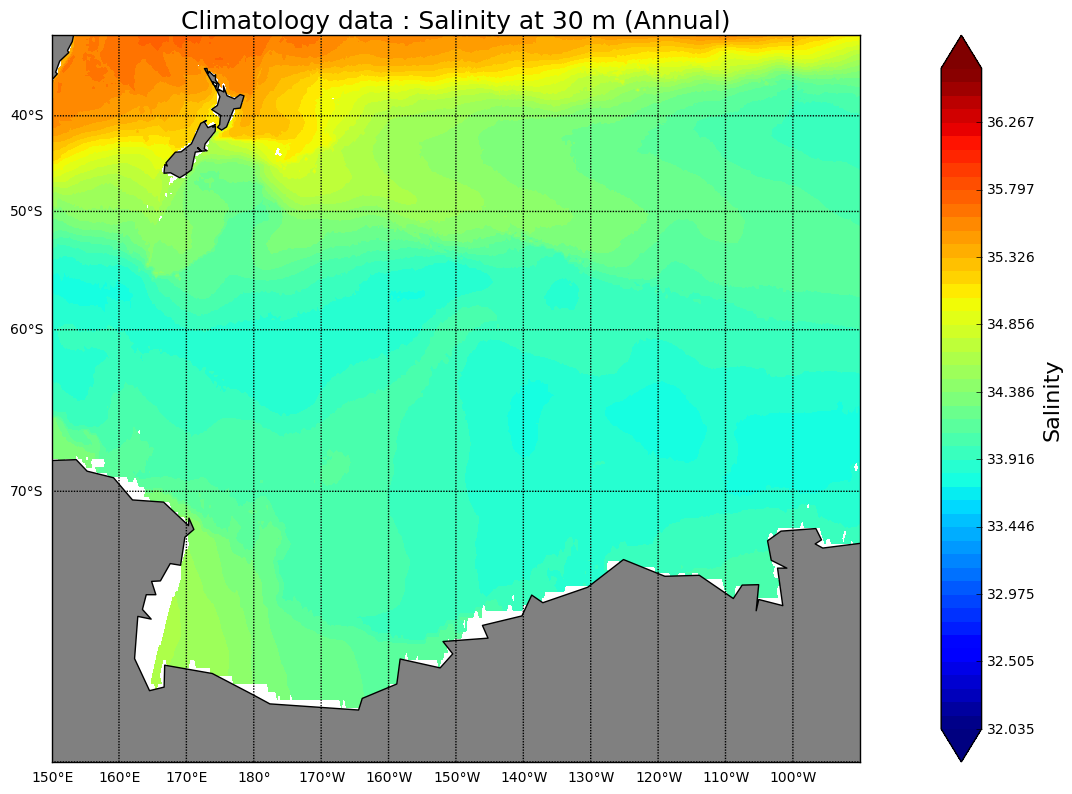

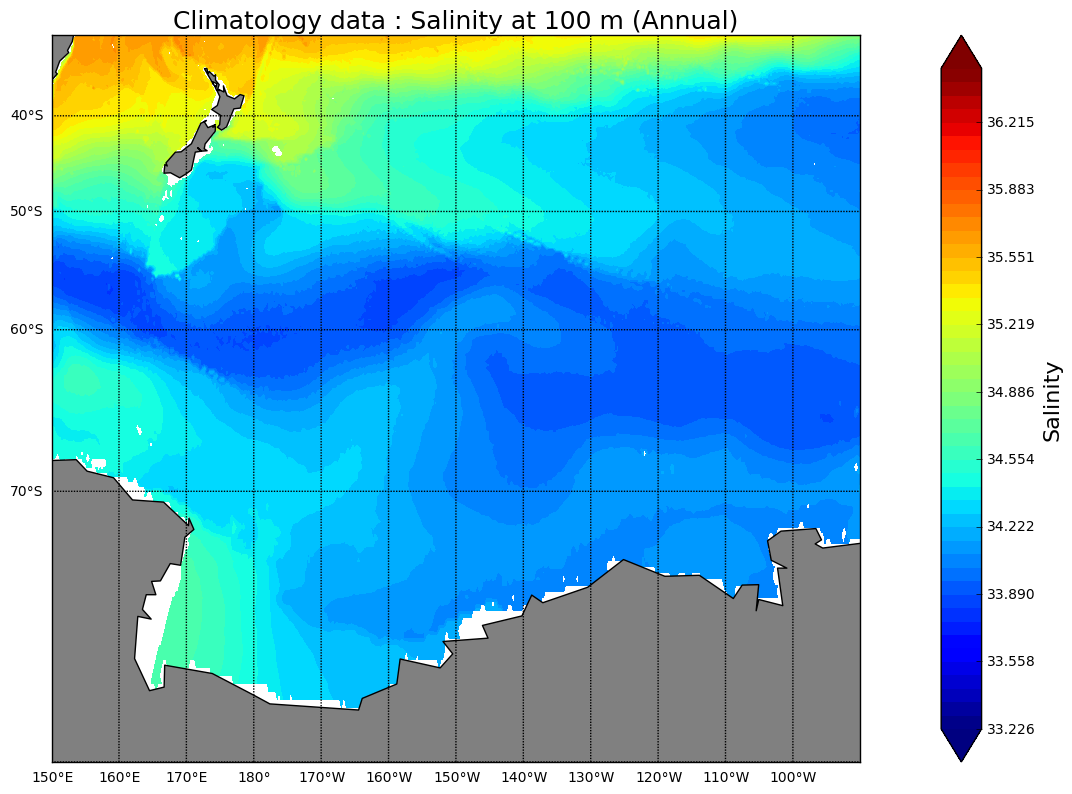

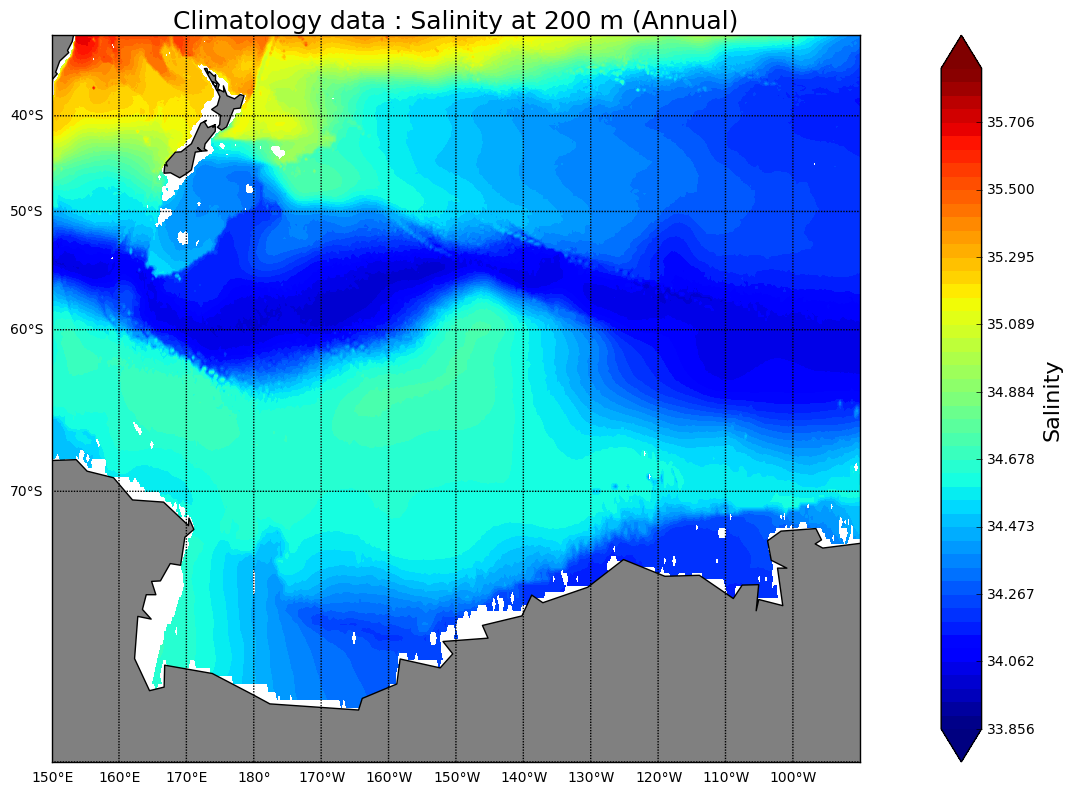

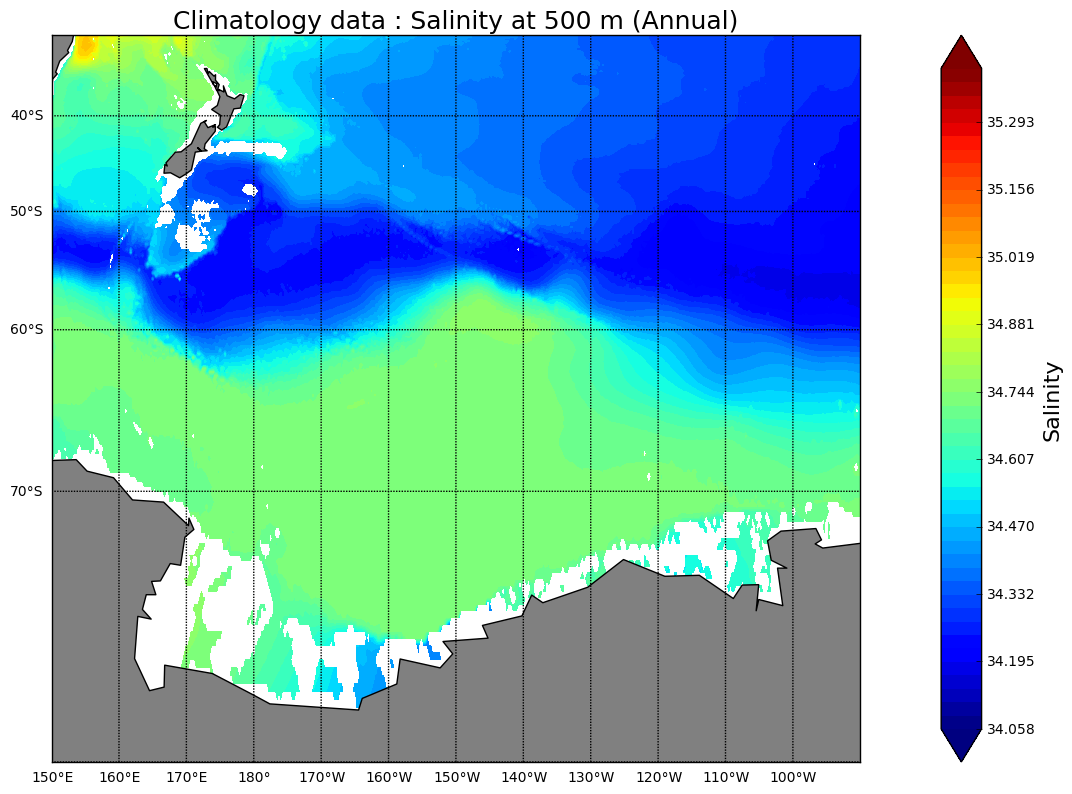

In [49]:
annual_mean('salinity', 0,  merc_map, 'Climatology data : Salinity at surface (Annual)', 'Salinity', plt.cm.jet, plot_path, 'Annual_merc_S_surf.png')
annual_mean('salinity', 6,  merc_map, 'Climatology data : Salinity at 30 m (Annual)', 'Salinity',     plt.cm.jet, plot_path,    'Annual_merc_S_30.png')
annual_mean('salinity', 12, merc_map, 'Climatology data : Salinity at 100 m (Annual)', 'Salinity',    plt.cm.jet, plot_path,   'Annual_merc_S_100.png')
annual_mean('salinity', 16, merc_map, 'Climatology data : Salinity at 200 m (Annual)', 'Salinity',   plt.cm.jet, plot_path,   'Annual_merc_S_200.png')
annual_mean('salinity', 22, merc_map, 'Climatology data : Salinity at 500 m (Annual)', 'Salinity',   plt.cm.jet, plot_path,   'Annual_merc_S_500.png')

## Lambert

('Temperature min, max, mean :', 18.886451721191406, 36.58958435058594, 34.35451755881114)
('Temperature min, max, mean :', 32.03492736816406, 36.643035888671875, 34.37571580805312)
('Temperature min, max, mean :', 33.22590637207031, 36.480499267578125, 34.433965092032786)
('Temperature min, max, mean :', 33.85647201538086, 35.870330810546875, 34.55899541301029)
('Temperature min, max, mean :', 34.057952880859375, 35.40282440185547, 34.538326690823574)


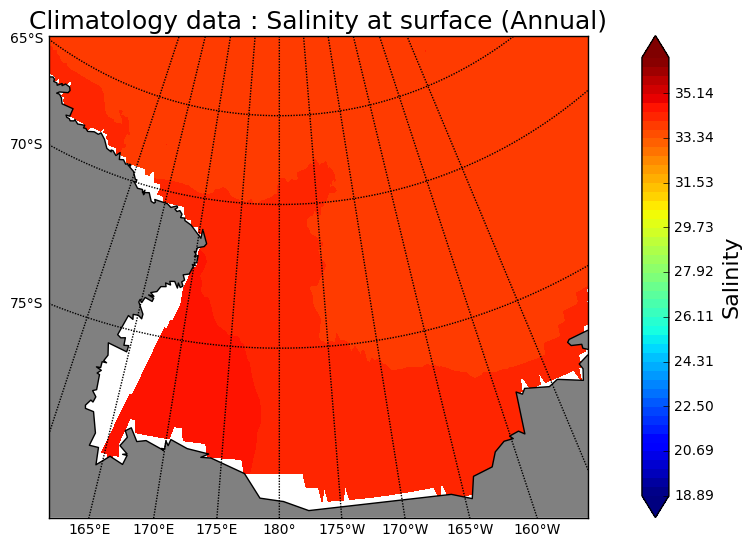

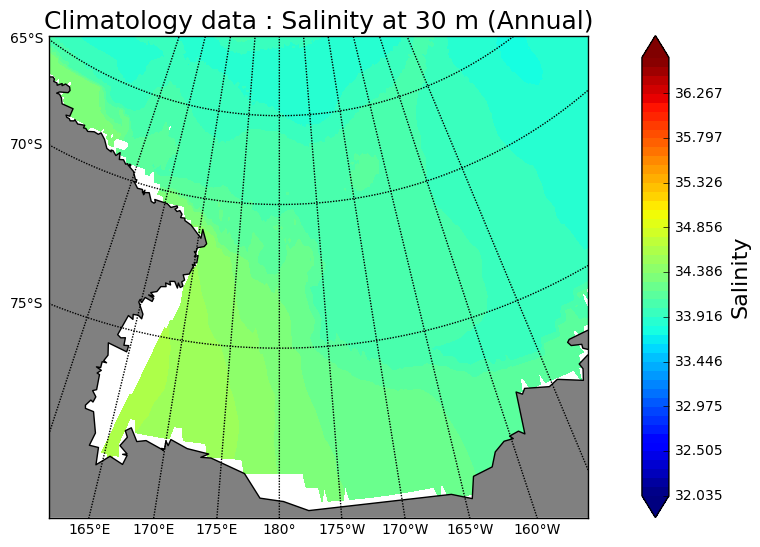

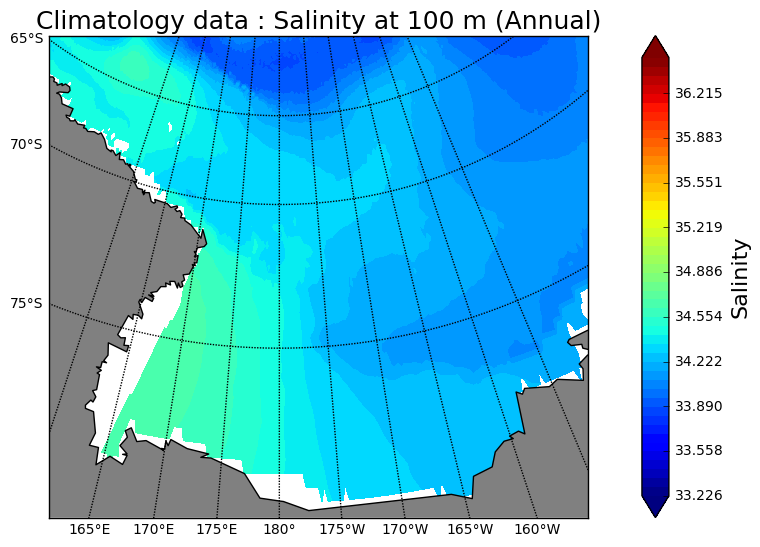

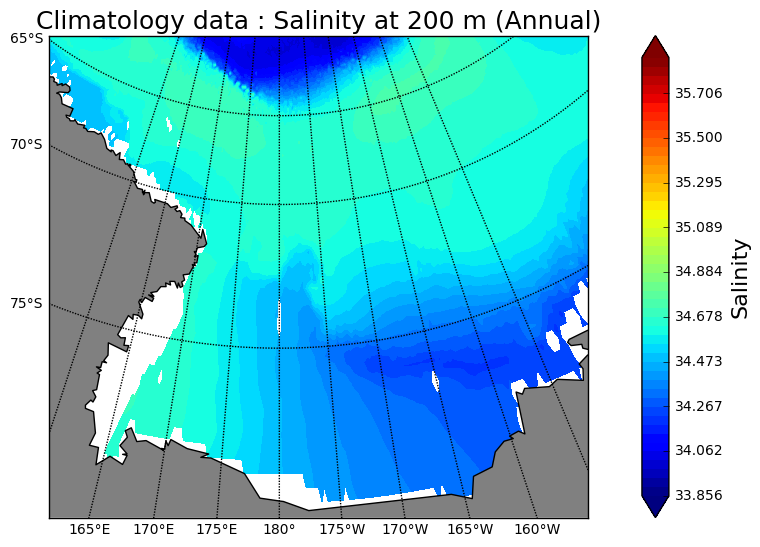

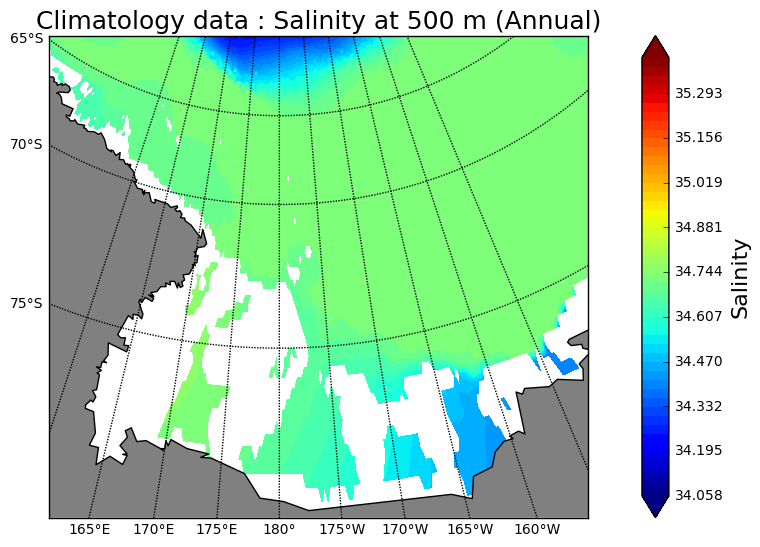

In [50]:
annual_mean('salinity', 0, lambert_map, 'Climatology data : Salinity at surface (Annual)', 'Salinity', plt.cm.jet, plot_path, 'Annual_lamb_S_surf.png')
annual_mean('salinity', 6,  lambert_map, 'Climatology data : Salinity at 30 m (Annual)', 'Salinity',     plt.cm.jet, plot_path,'Annual_lamb_S_30.png')
annual_mean('salinity', 12, lambert_map, 'Climatology data : Salinity at 100 m (Annual)', 'Salinity',    plt.cm.jet, plot_path,'Annual_lamb_S_100.png')
annual_mean('salinity', 16, lambert_map, 'Climatology data : Salinity at 200 m (Annual)', 'Salinity',   plt.cm.jet, plot_path, 'Annual_lamb_S_200.png')
annual_mean('salinity', 22, lambert_map, 'Climatology data : Salinity at 500 m (Annual)', 'Salinity',   plt.cm.jet, plot_path, 'Annual_lamb_S_500.png')

***

# Seasonal mean (DJF and JJA)

## Mercator

In [ ]:
seasonal_mean(1, np.linspace(-1.8,26,50), 'salinity',    6, merc_map, 'Climatology data : Salinity at 30 m (Winter)', 'Salinity', plt.cm.jet, plot_path,  'Winter_merc_S_30.png')
seasonal_mean(1, np.linspace(-1.9,21.7,50), 'salinity', 12, merc_map, 'Climatology data : Salinity at 100 m (Winter)', 'Salinity', plt.cm.jet, plot_path, 'Winter_merc_S_100.png')
seasonal_mean(1, np.linspace(-2,19,50), 'salinity',     16, merc_map, 'Climatology data : Salinity at 200 m (Winter)', 'Salinity', plt.cm.jet, plot_path, 'Winter_merc_S_200.png')

seasonal_mean(0, np.linspace(-1.9,22.6,50), 'salinity',  6, merc_map, 'Climatology data : Salinity at 30 m (Summer)', 'Salinity', plt.cm.jet, plot_path,  'Summer_merc_S_30.png')
seasonal_mean(0, np.linspace(-1.9,21.5,50), 'salinity', 12, merc_map, 'Climatology data : Salinity at 100 m (Summer)', 'Salinity', plt.cm.jet, plot_path, 'Summer_merc_S_100.png')
seasonal_mean(0, np.linspace(-2,19.3,50), 'salinity',   16, merc_map, 'Climatology data : Salinity at 200 m (Summer)', 'Salinity', plt.cm.jet, plot_path, 'Summer_merc_S_200.png')

('Temperature min, max, mean :', 31.75513458251953, 36.786563873291016, 34.34852286149582)
('Temperature min, max, mean :', 32.79293441772461, 36.54193115234375, 34.44366841989706)
('Temperature min, max, mean :', 33.86106872558594, 35.85236740112305, 34.55675149824688)
('Temperature min, max, mean :', 32.30936813354492, 36.57303237915039, 34.39982261401695)
('Temperature min, max, mean :', 33.538665771484375, 36.4659309387207, 34.425004028695376)
('Temperature min, max, mean :', 33.83903121948242, 35.936798095703125, 34.56187559305677)


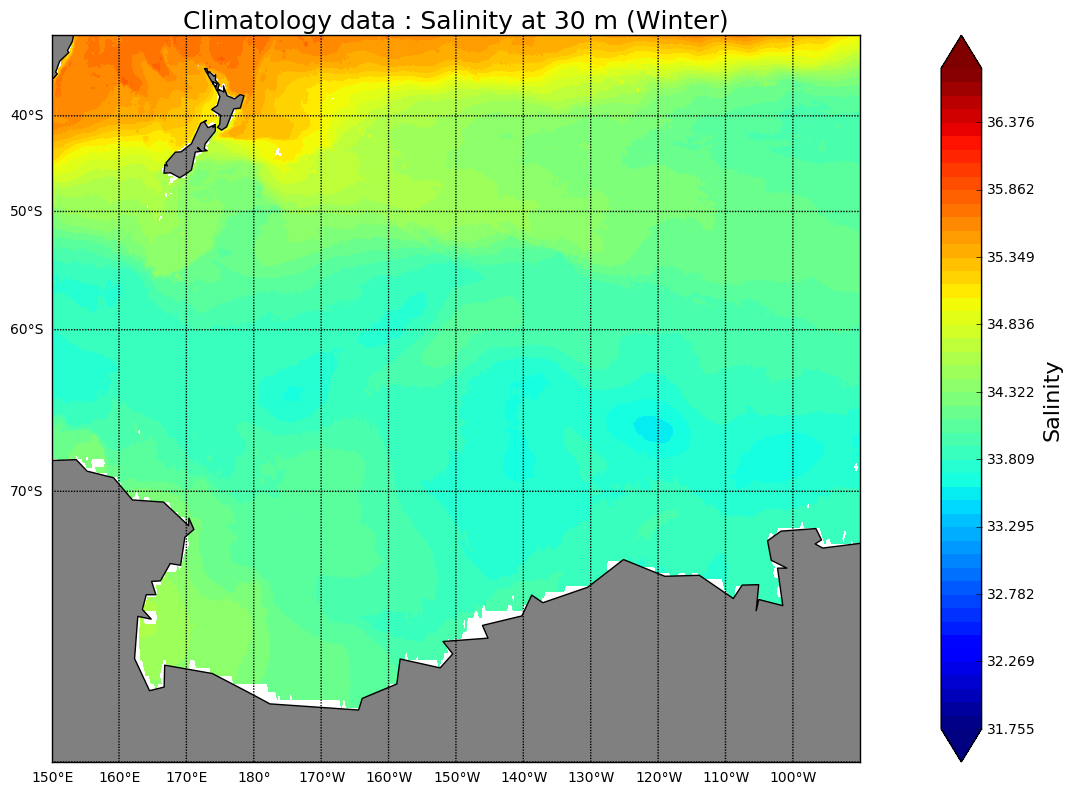

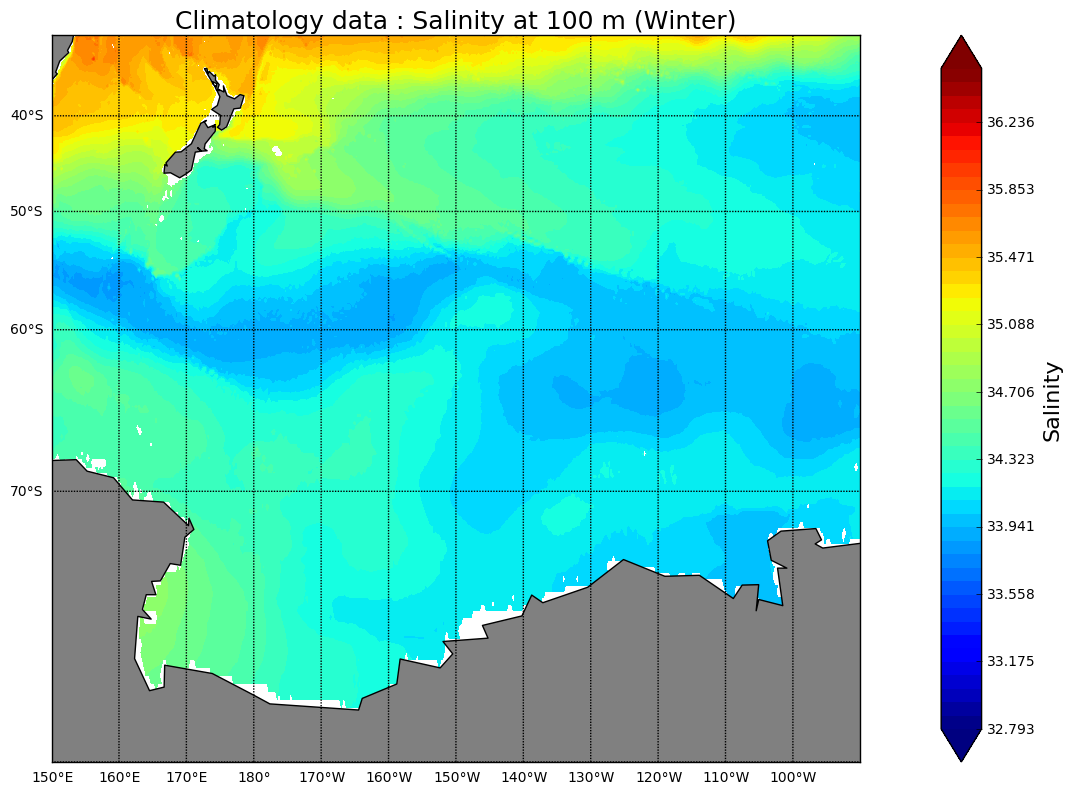

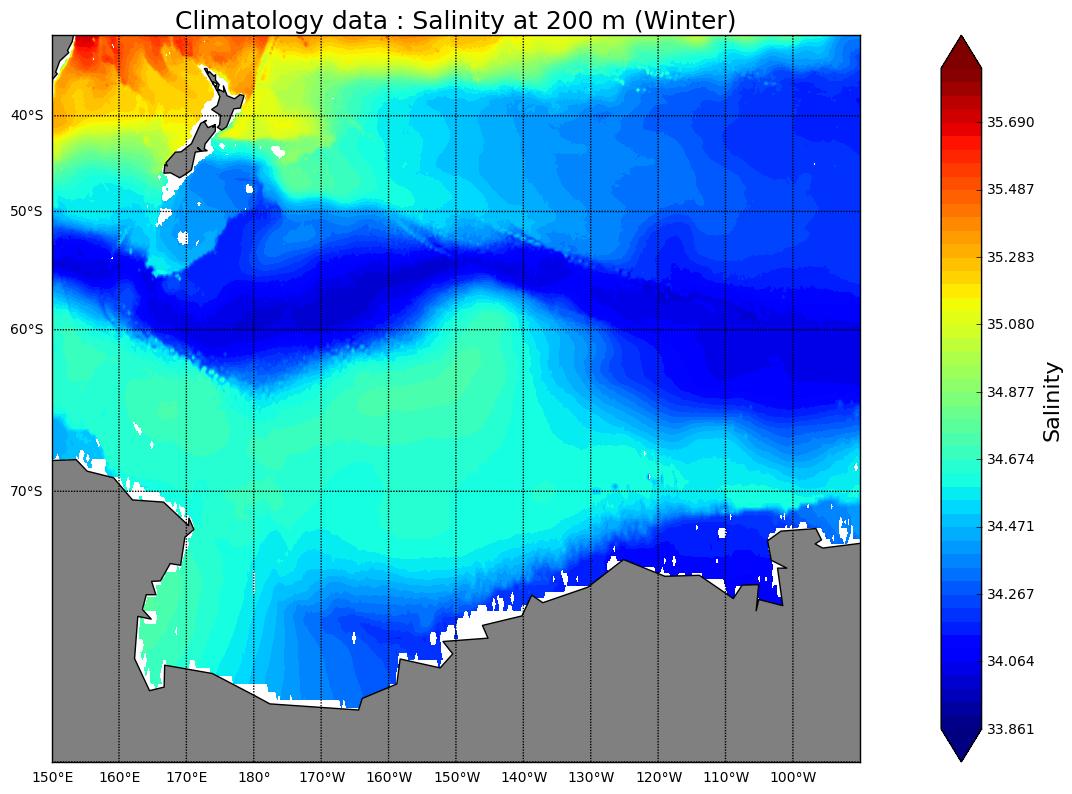

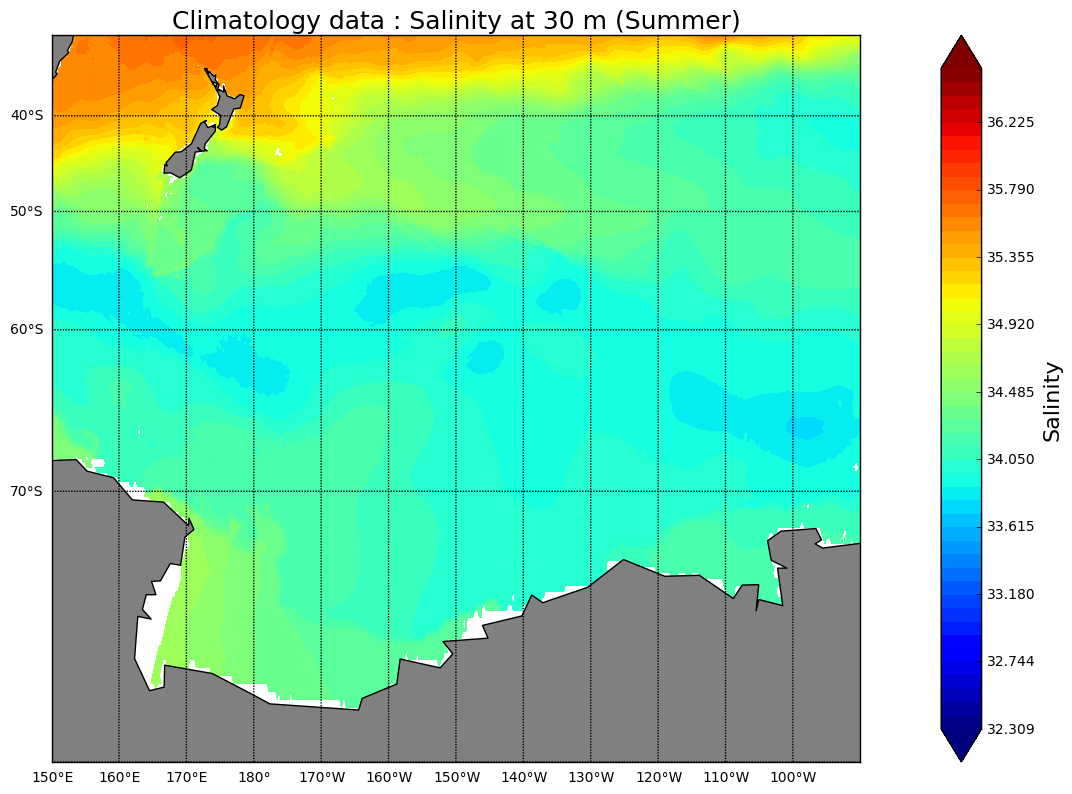

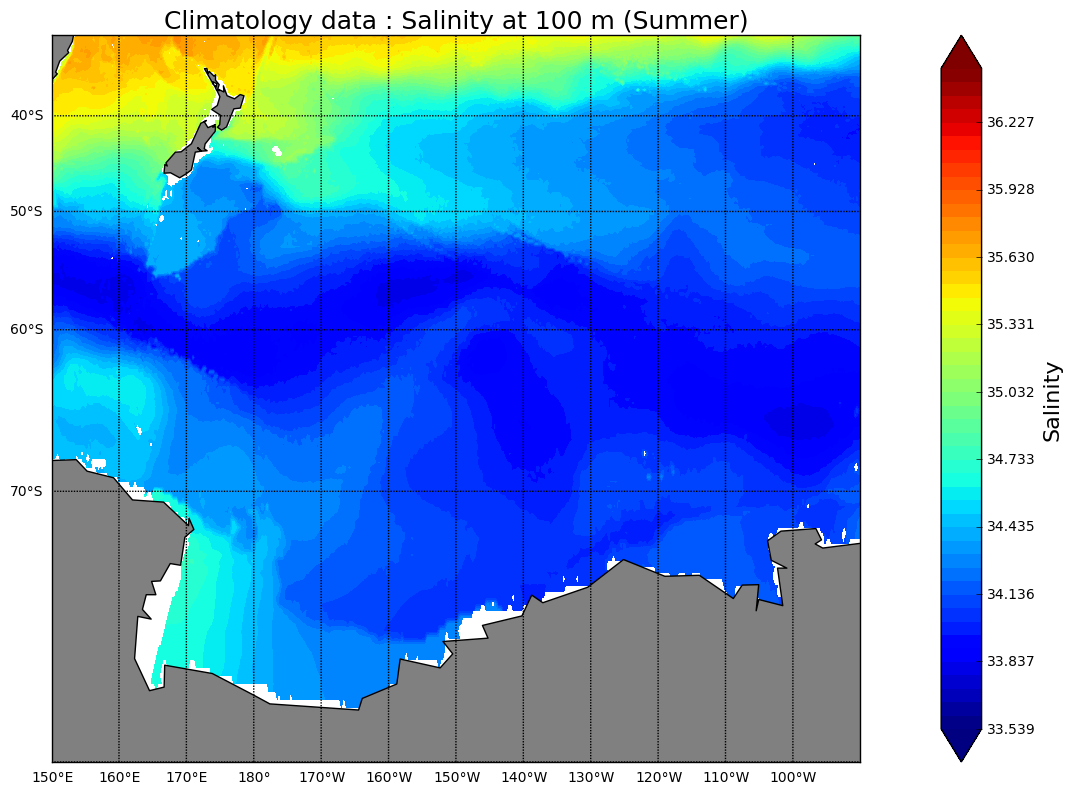

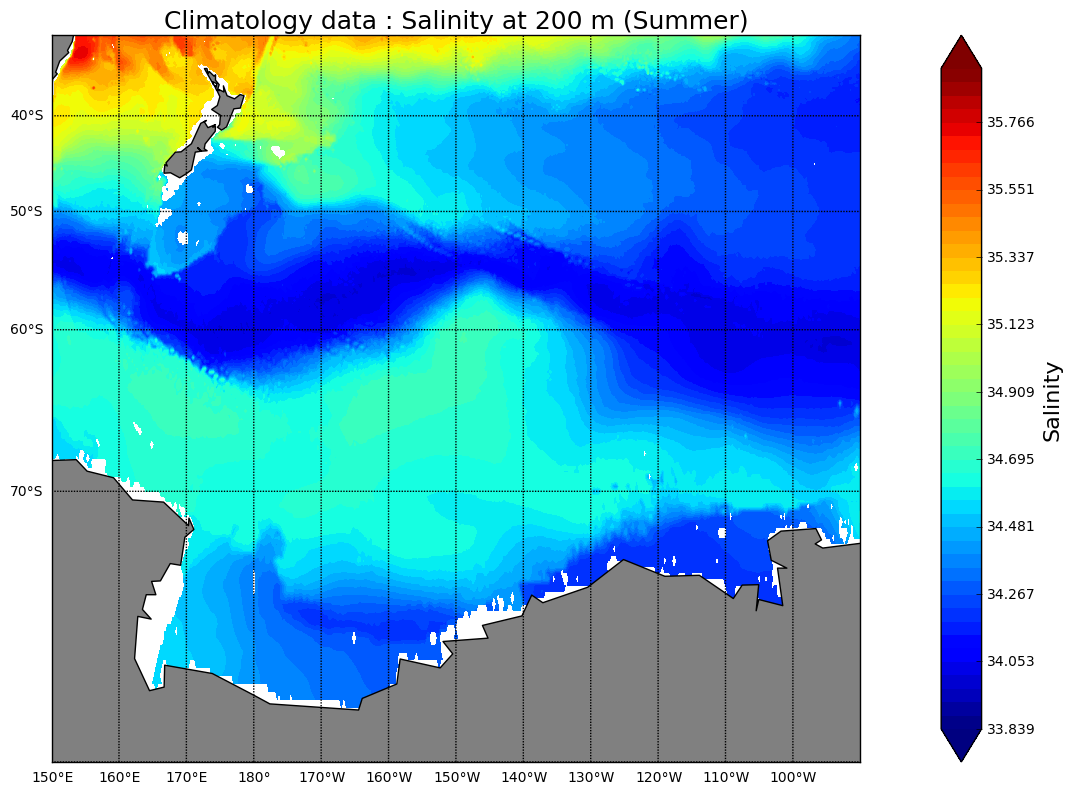

In [51]:
seasonal_mean(1, 'salinity',    6, merc_map, 'Climatology data : Salinity at 30 m (Winter)', 'Salinity', plt.cm.jet, plot_path,  'Winter_merc_S_30.png')
seasonal_mean(1, 'salinity', 12, merc_map, 'Climatology data : Salinity at 100 m (Winter)', 'Salinity', plt.cm.jet, plot_path, 'Winter_merc_S_100.png')
seasonal_mean(1, 'salinity',     16, merc_map, 'Climatology data : Salinity at 200 m (Winter)', 'Salinity', plt.cm.jet, plot_path, 'Winter_merc_S_200.png')

seasonal_mean(0, 'salinity',  6, merc_map, 'Climatology data : Salinity at 30 m (Summer)', 'Salinity', plt.cm.jet, plot_path,  'Summer_merc_S_30.png')
seasonal_mean(0, 'salinity', 12, merc_map, 'Climatology data : Salinity at 100 m (Summer)', 'Salinity', plt.cm.jet, plot_path, 'Summer_merc_S_100.png')
seasonal_mean(0, 'salinity',   16, merc_map, 'Climatology data : Salinity at 200 m (Summer)', 'Salinity', plt.cm.jet, plot_path, 'Summer_merc_S_200.png')

## Lambert

('Temperature min, max, mean :', 31.75513458251953, 36.786563873291016, 34.34852286149582)
('Temperature min, max, mean :', 32.79293441772461, 36.54193115234375, 34.44366841989706)
('Temperature min, max, mean :', 33.86106872558594, 35.85236740112305, 34.55675149824688)
('Temperature min, max, mean :', 32.30936813354492, 36.57303237915039, 34.39982261401695)
('Temperature min, max, mean :', 33.538665771484375, 36.4659309387207, 34.425004028695376)
('Temperature min, max, mean :', 33.83903121948242, 35.936798095703125, 34.56187559305677)


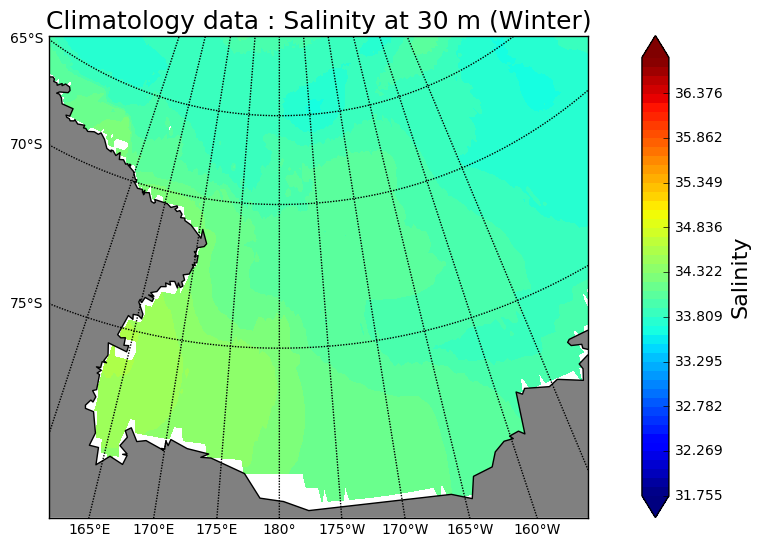

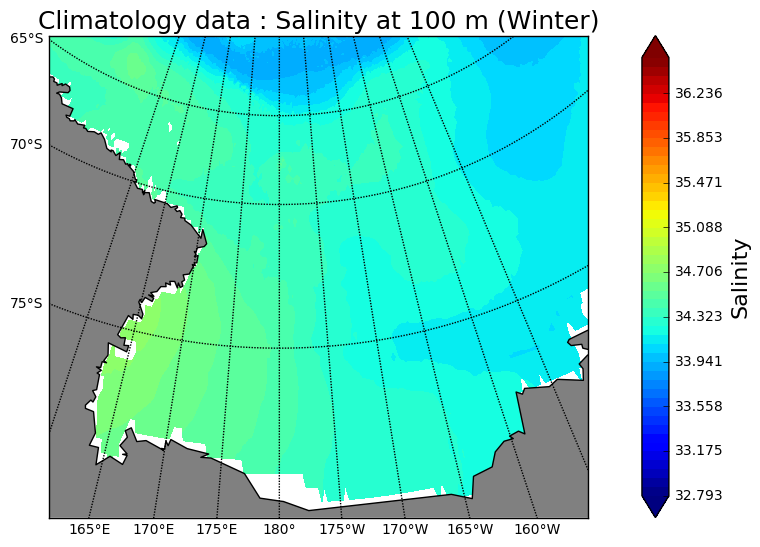

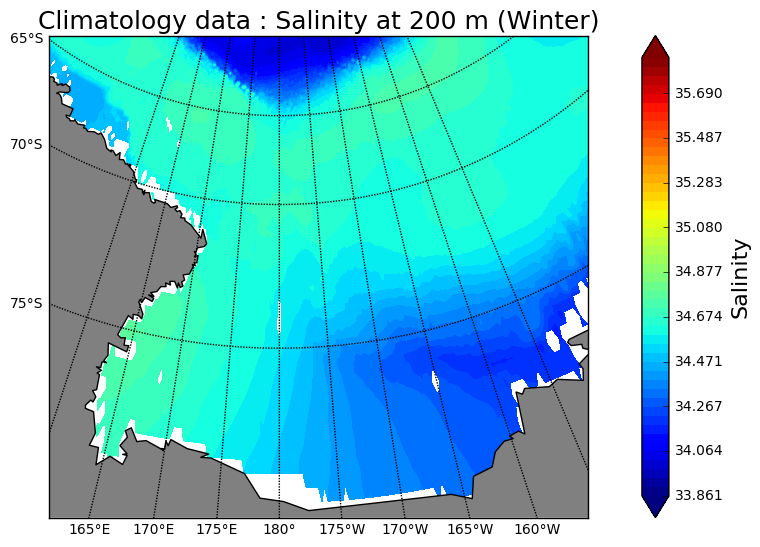

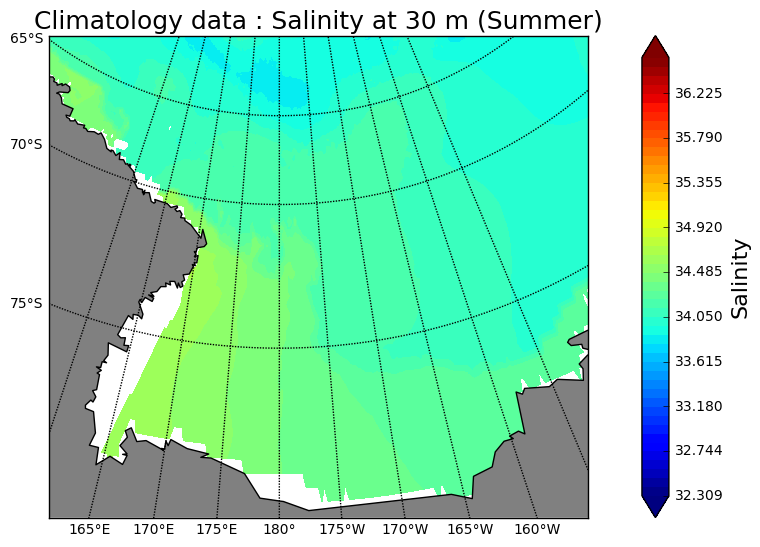

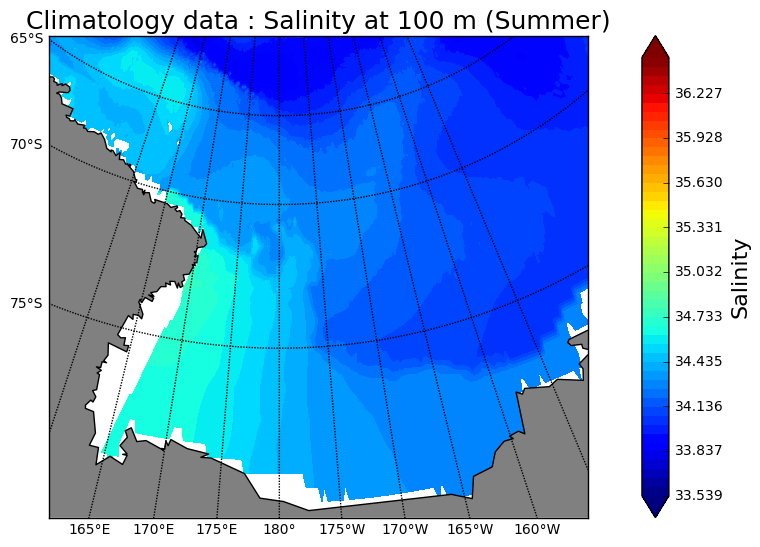

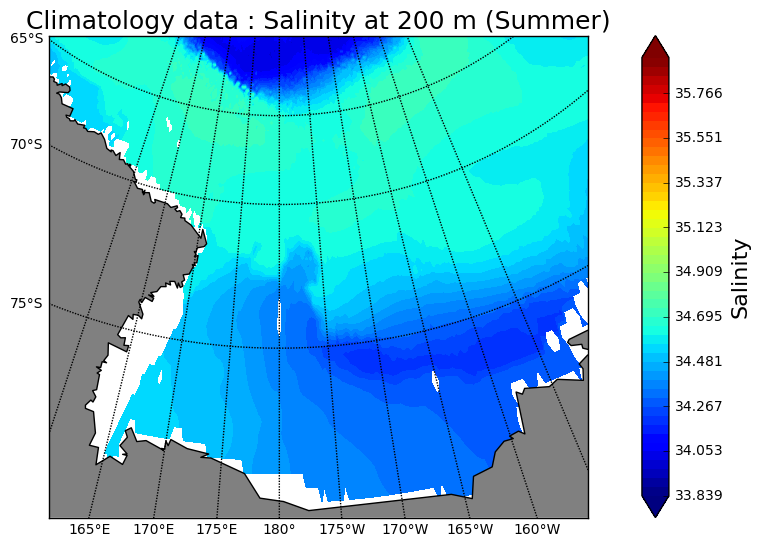

In [52]:
seasonal_mean(1, 'salinity',    6, lambert_map, 'Climatology data : Salinity at 30 m (Winter)', 'Salinity', plt.cm.jet, plot_path,  'Winter_lamb_S_30.png')
seasonal_mean(1, 'salinity', 12, lambert_map, 'Climatology data : Salinity at 100 m (Winter)', 'Salinity', plt.cm.jet, plot_path, 'Winter_lamb_S_100.png')
seasonal_mean(1, 'salinity',     16, lambert_map, 'Climatology data : Salinity at 200 m (Winter)', 'Salinity', plt.cm.jet, plot_path, 'Winter_lamb_S_200.png')

seasonal_mean(0, 'salinity',  6, lambert_map, 'Climatology data : Salinity at 30 m (Summer)', 'Salinity', plt.cm.jet, plot_path,  'Summer_lamb_S_30.png')
seasonal_mean(0, 'salinity', 12, lambert_map, 'Climatology data : Salinity at 100 m (Summer)', 'Salinity', plt.cm.jet, plot_path, 'Summer_lamb_S_100.png')
seasonal_mean(0, 'salinity',   16, lambert_map, 'Climatology data : Salinity at 200 m (Summer)', 'Salinity', plt.cm.jet, plot_path, 'Summer_lamb_S_200.png')

***

# Differences (climatology - model)

## Mercator

('loaded from : ', '/data/ebent/mean_Salt_surf_2.npy')
('Diff min, max, mean :', -15.514962863046819, 35.98262405395508, 2.603909628978113)
('loaded from : ', '/data/ebent/mean_Salt_30_2.npy')
('Diff min, max, mean :', -1.8809631166269085, 35.988433837890625, 2.558408192616639)
('loaded from : ', '/data/ebent/mean_Salt_100_2.npy')
('Diff min, max, mean :', -1.4922561203946998, 36.0755729675293, 2.644030480979279)
('loaded from : ', '/data/ebent/mean_Salt_200_2.npy')
('Diff min, max, mean :', -1.1790042210978129, 35.82644271850586, 2.712570673557492)
('loaded from : ', '/data/ebent/mean_Salt_500_2.npy')
('Diff min, max, mean :', -0.5933064836113005, 35.40282440185547, 2.92302303188606)


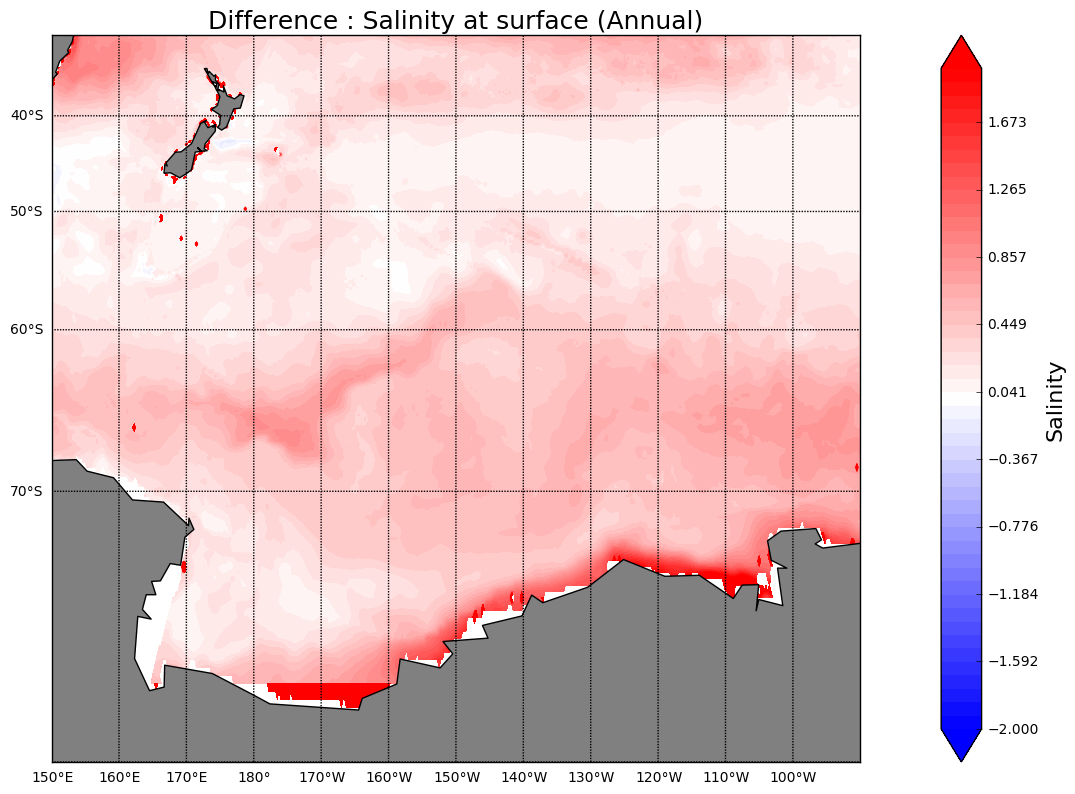

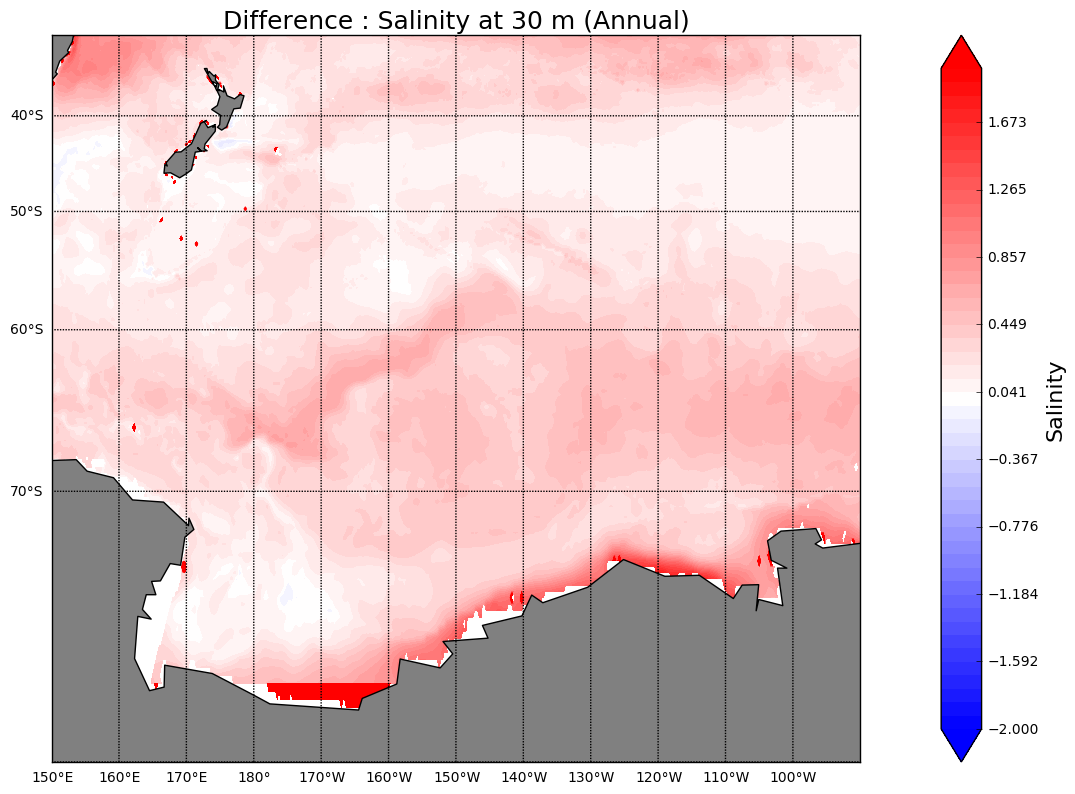

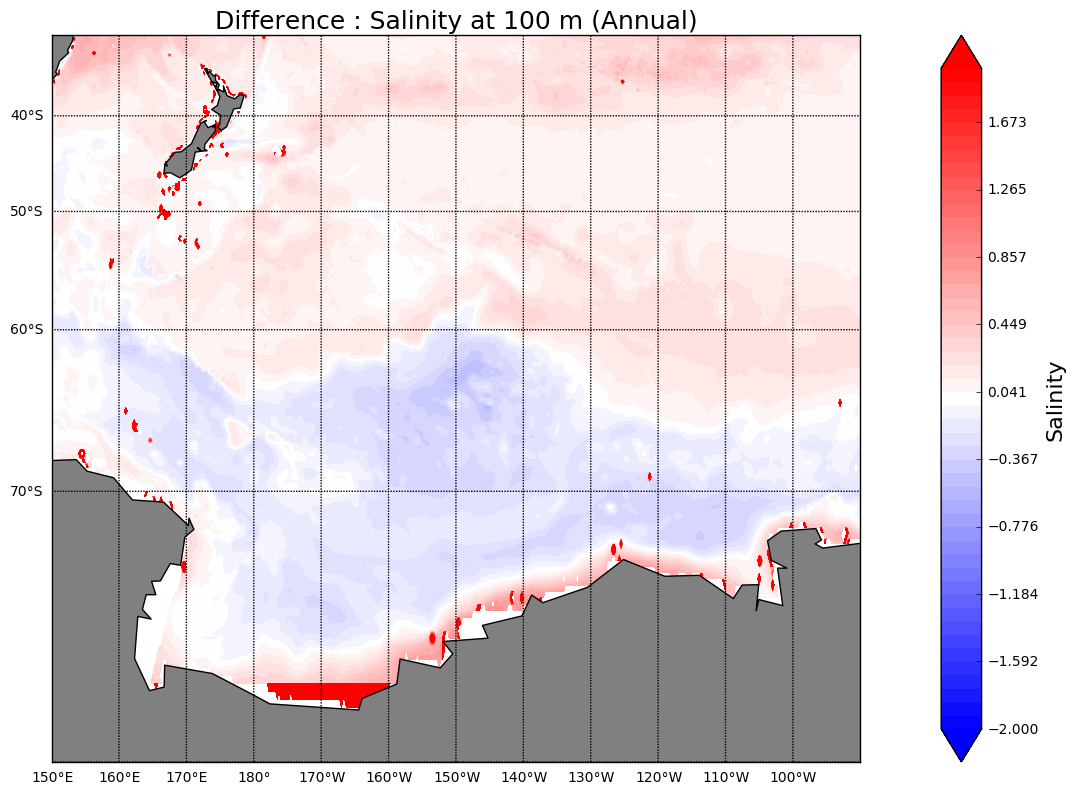

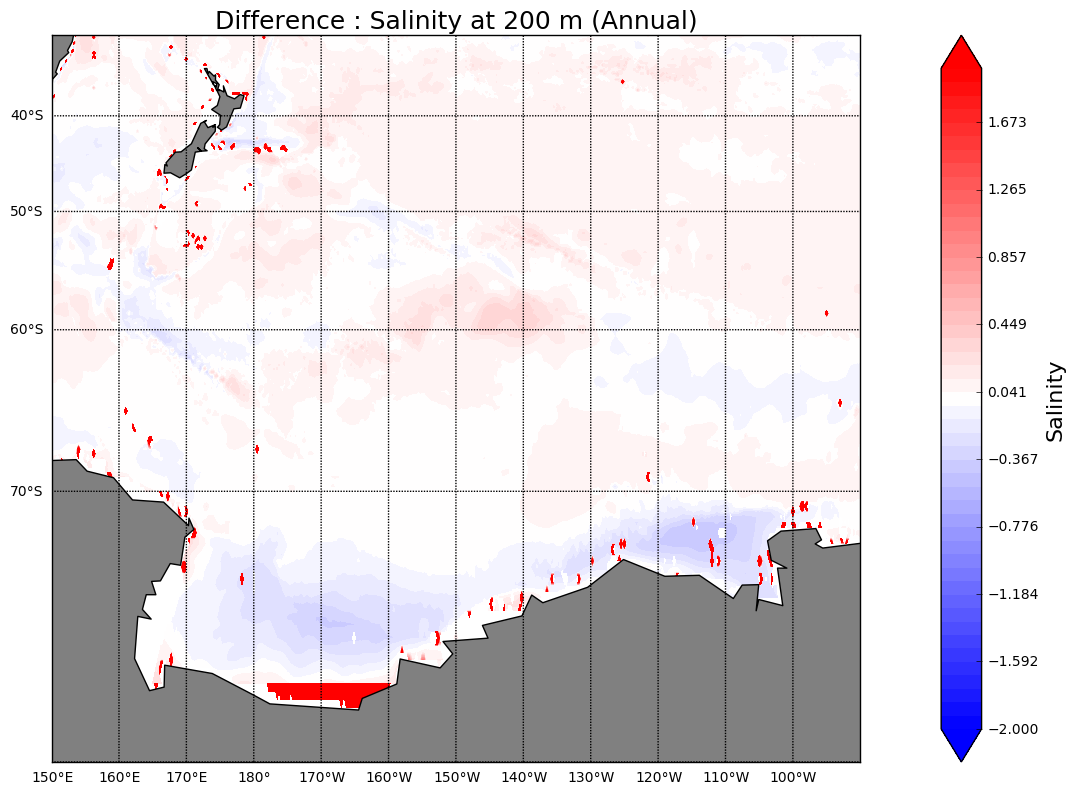

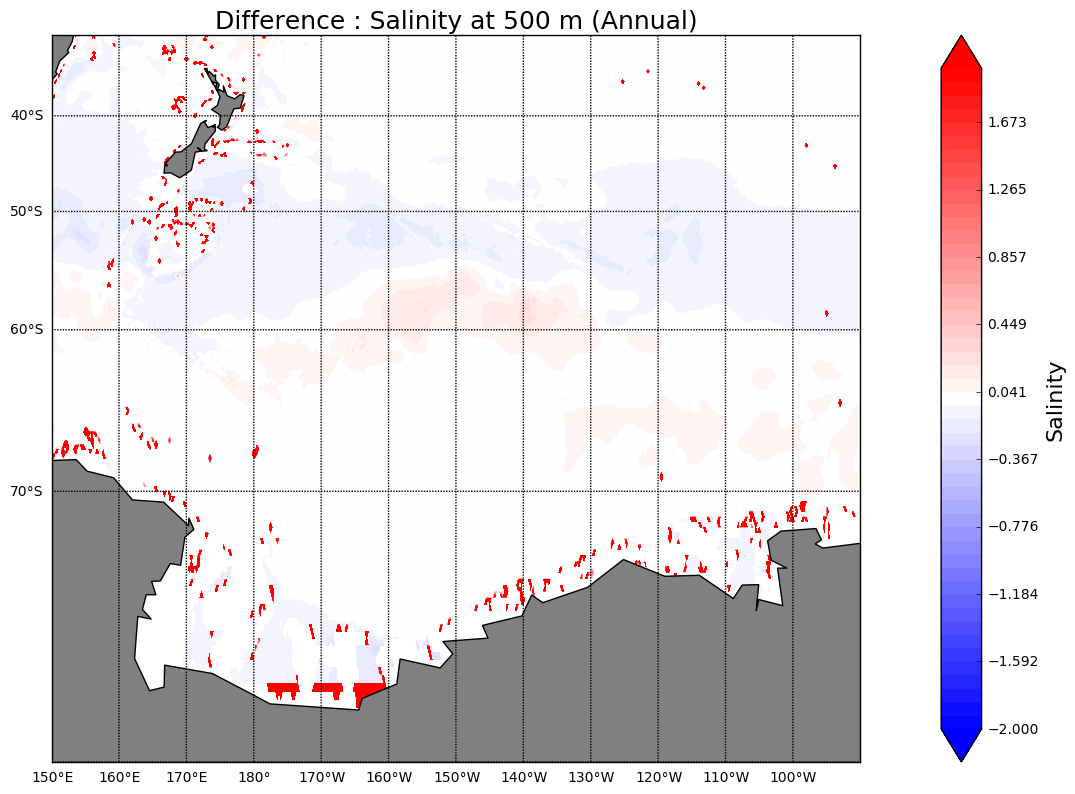

In [53]:
annual_diff(1, np.linspace(-2,2,50), 'salinity', 0, 'mean_Salt_surf_2', 'Difference : Salinity at surface (Annual)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Annual_merc_S_surf.png')
annual_diff(1, np.linspace(-2,2,50), 'salinity', 6,   'mean_Salt_30_2', 'Difference : Salinity at 30 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,    'Diff_Annual_merc_S_30.png')
annual_diff(1, np.linspace(-2,2,50), 'salinity', 12, 'mean_Salt_100_2', 'Difference : Salinity at 100 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,   'Diff_Annual_merc_S_100.png')
annual_diff(1, np.linspace(-2,2,50), 'salinity', 16, 'mean_Salt_200_2', 'Difference : Salinity at 200 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,   'Diff_Annual_merc_S_200.png')
annual_diff(1, np.linspace(-2,2,50), 'salinity', 22, 'mean_Salt_500_2', 'Difference : Salinity at 500 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,    'Diff_Annual_merc_S_500.png')

## Lambert

('loaded from : ', '/data/ebent/mean_Salt_surf.npy')
('Diff min, max, mean :', -15.832035458748862, 34.54464340209961, -0.058888532157521385)
('loaded from : ', '/data/ebent/mean_Salt_30.npy')
('Diff min, max, mean :', -1.462424950186822, 34.57371520996094, 0.8293029985230207)
('loaded from : ', '/data/ebent/mean_Salt_100.npy')
('Diff min, max, mean :', -1.3024455456160453, 34.64448928833008, -0.05543319314712999)
('loaded from : ', '/data/ebent/mean_Salt_200.npy')
('Diff min, max, mean :', -0.8244720179860607, 34.668209075927734, -0.0018256037273674075)
('loaded from : ', '/data/ebent/mean_Salt_500.npy')
('Diff min, max, mean :', -0.6605342990808936, 34.76572799682617, -0.0839731848139486)


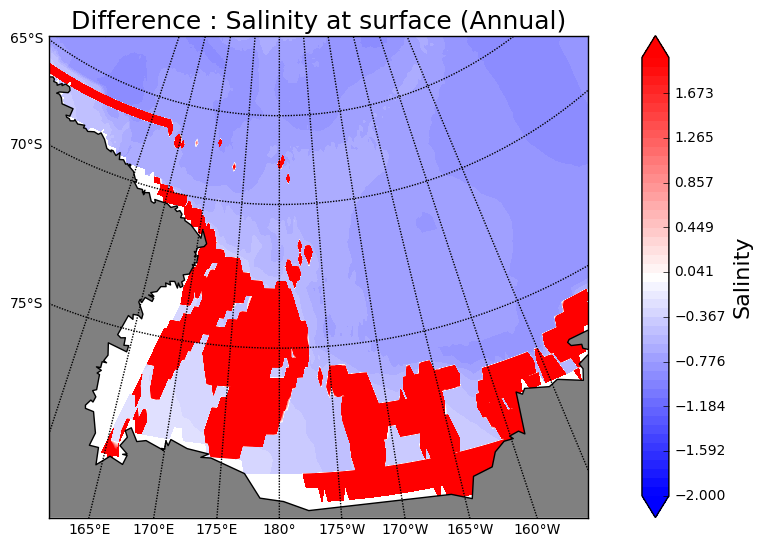

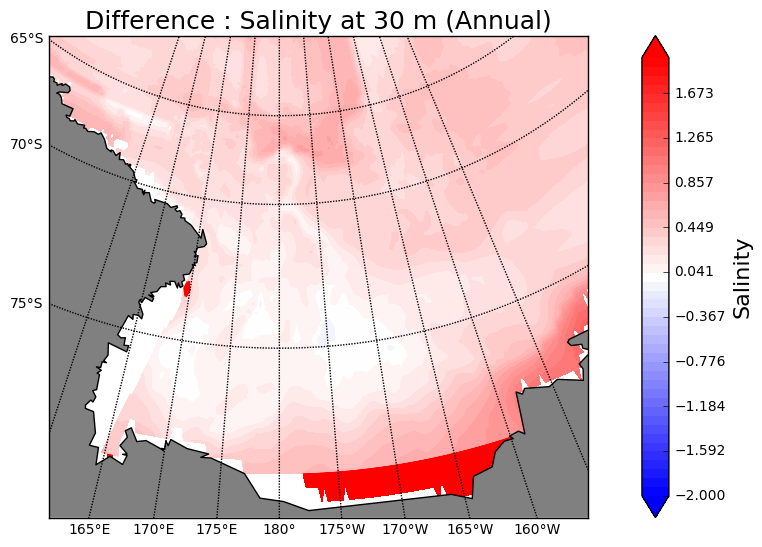

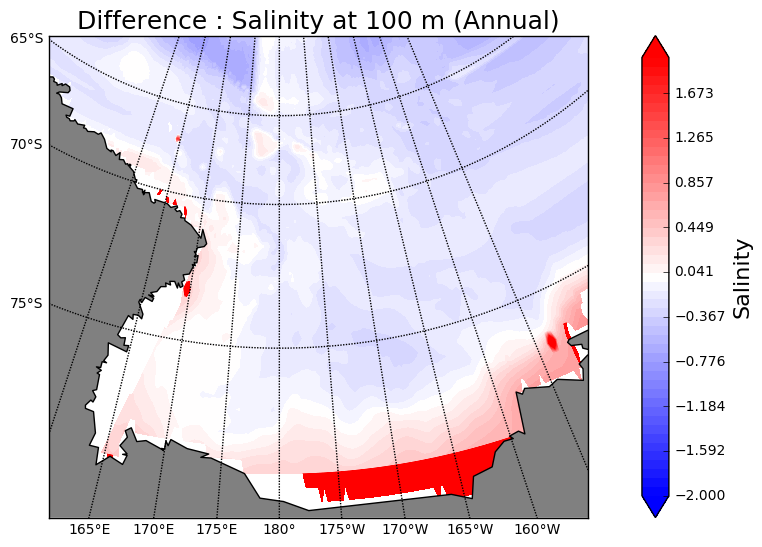

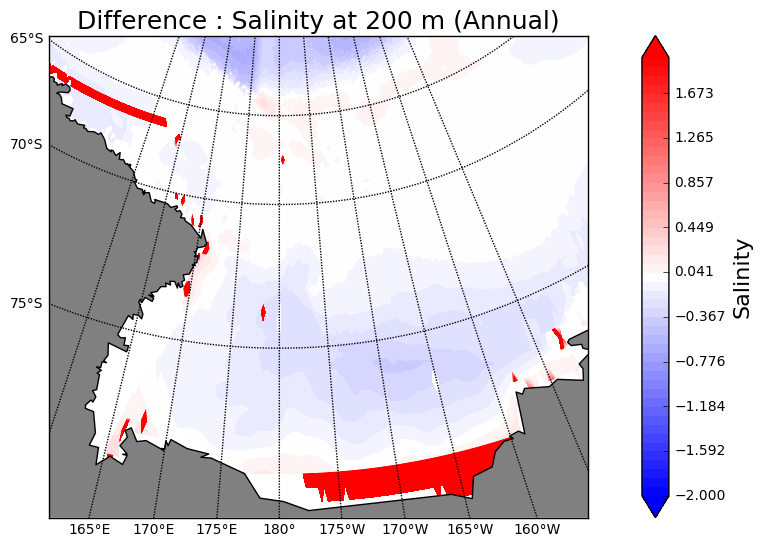

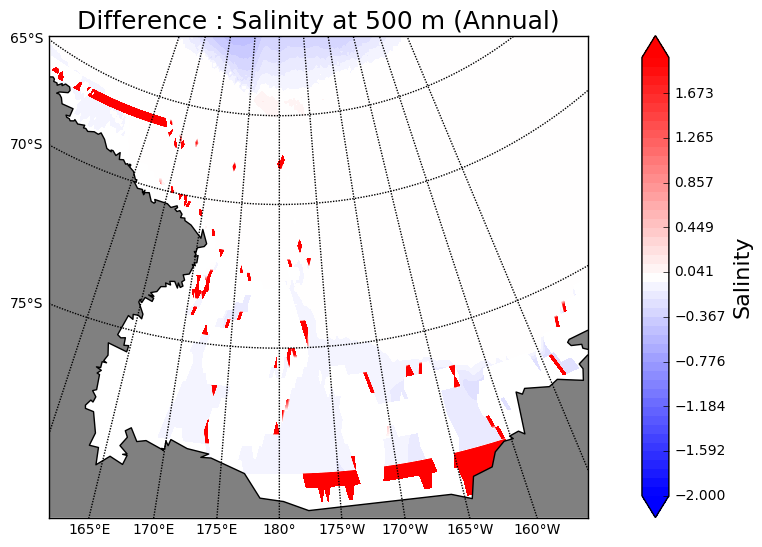

In [54]:
annual_diff(0, np.linspace(-2,2,50), 'salinity', 0, 'mean_Salt_surf', 'Difference : Salinity at surface (Annual)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Annual_lamb_S_surf.png')
annual_diff(0, np.linspace(-2,2,50), 'salinity', 6,   'mean_Salt_30', 'Difference : Salinity at 30 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,    'Diff_Annual_lamb_S_30.png')
annual_diff(0, np.linspace(-2,2,50), 'salinity', 12, 'mean_Salt_100', 'Difference : Salinity at 100 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,   'Diff_Annual_lamb_S_100.png')
annual_diff(0, np.linspace(-2,2,50), 'salinity', 16, 'mean_Salt_200', 'Difference : Salinity at 200 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,   'Diff_Annual_lamb_S_200.png')
annual_diff(0, np.linspace(-2,2,50), 'salinity', 22, 'mean_Salt_500', 'Difference : Salinity at 500 m (Annual)', 'Salinity', plt.cm.bwr, plot_path,   'Diff_Annual_lamb_S_500.png')

***

# DJF and JJA compared to T1,T2,T12 and T6,T7,T8

## Mercator

('loaded from : ', '/data/ebent/mean_Salt_30_DJF.npy')
('Diff min, max, mean :', -2.173350485332371, 36.10017013549805, 2.5584602748148924)
('loaded from : ', '/data/ebent/mean_Salt_100_DJF.npy')
('Diff min, max, mean :', -1.508144465790302, 36.083133697509766, 2.651980667976117)
('loaded from : ', '/data/ebent/mean_Salt_200_DJF.npy')
('Diff min, max, mean :', -1.2506318570176589, 35.85236740112305, 2.7162491793140475)
('loaded from : ', '/data/ebent/mean_Salt_30_JJA.npy')
('Diff min, max, mean :', -1.670829494372235, 35.94343566894531, 2.7031512661512314)
('loaded from : ', '/data/ebent/mean_Salt_100_JJA.npy')
('Diff min, max, mean :', -1.545012903996735, 36.108402252197266, 2.7987019809485902)
('loaded from : ', '/data/ebent/mean_Salt_200_JJA.npy')
('Diff min, max, mean :', -1.2062768586005603, 35.936798095703125, 2.7629497548487225)


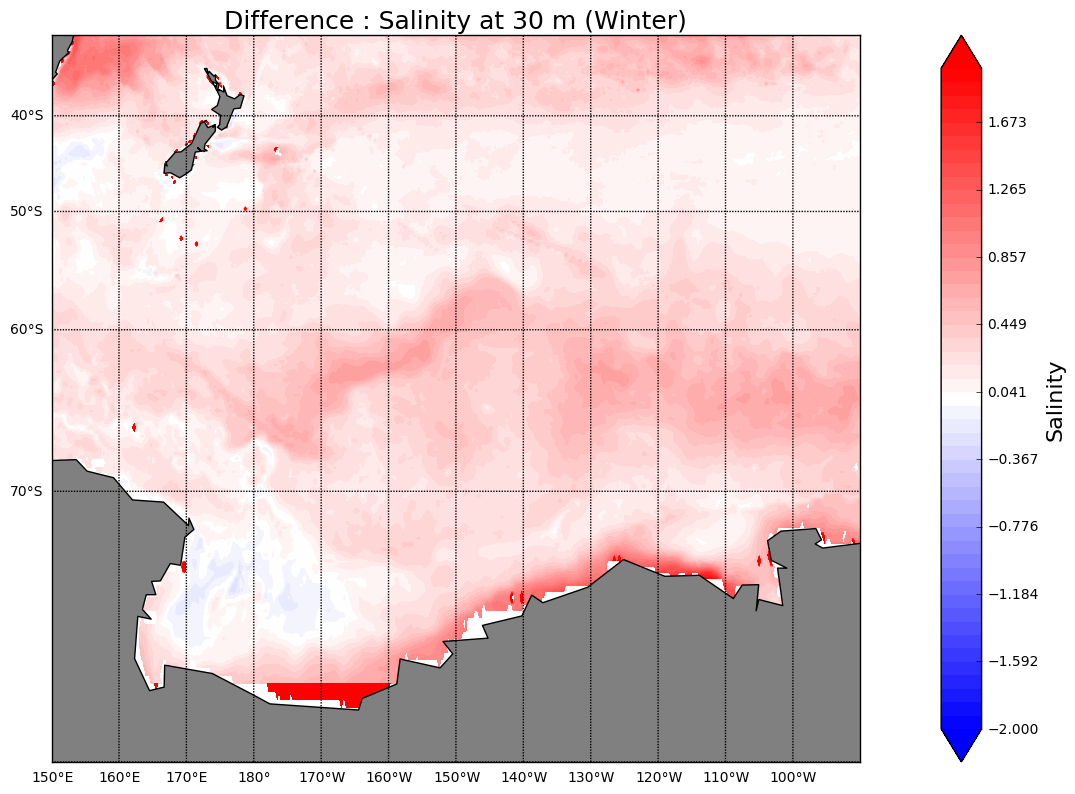

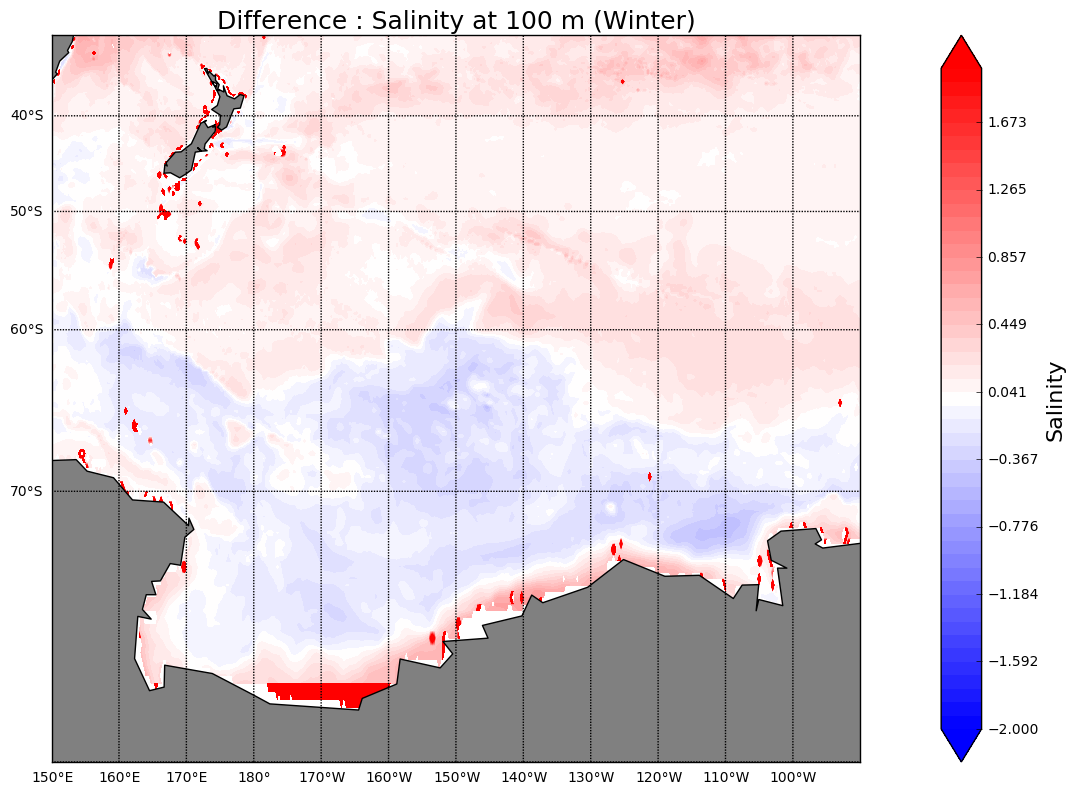

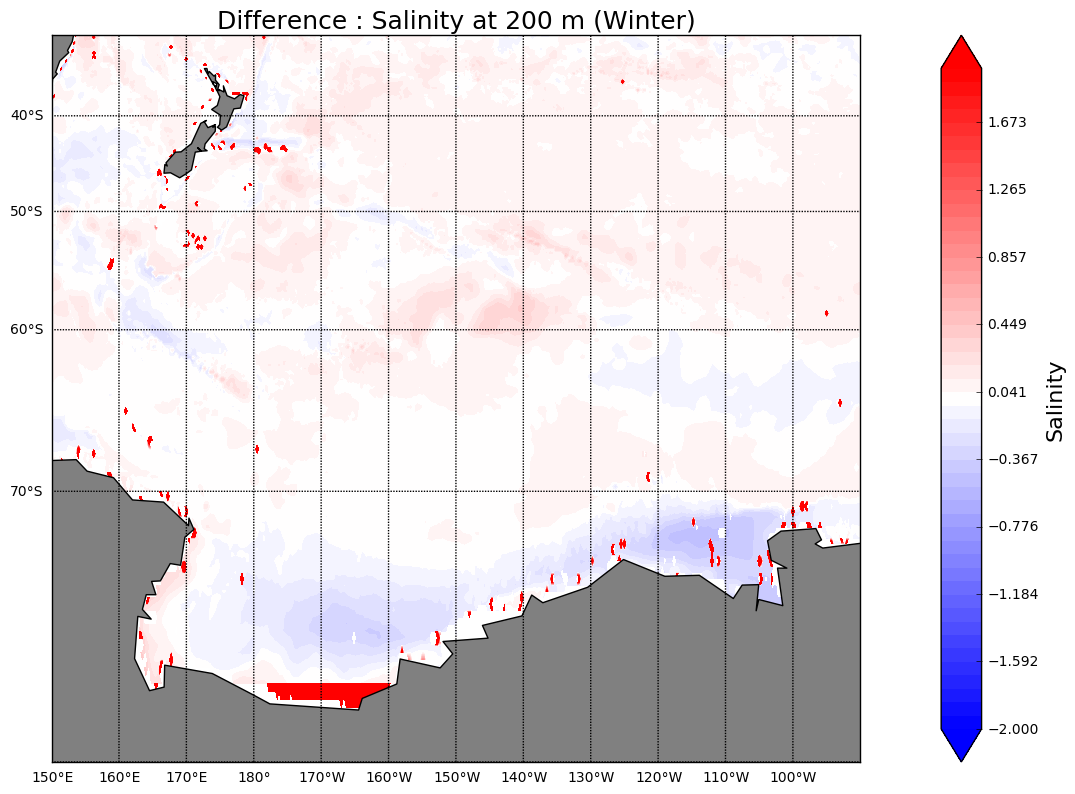

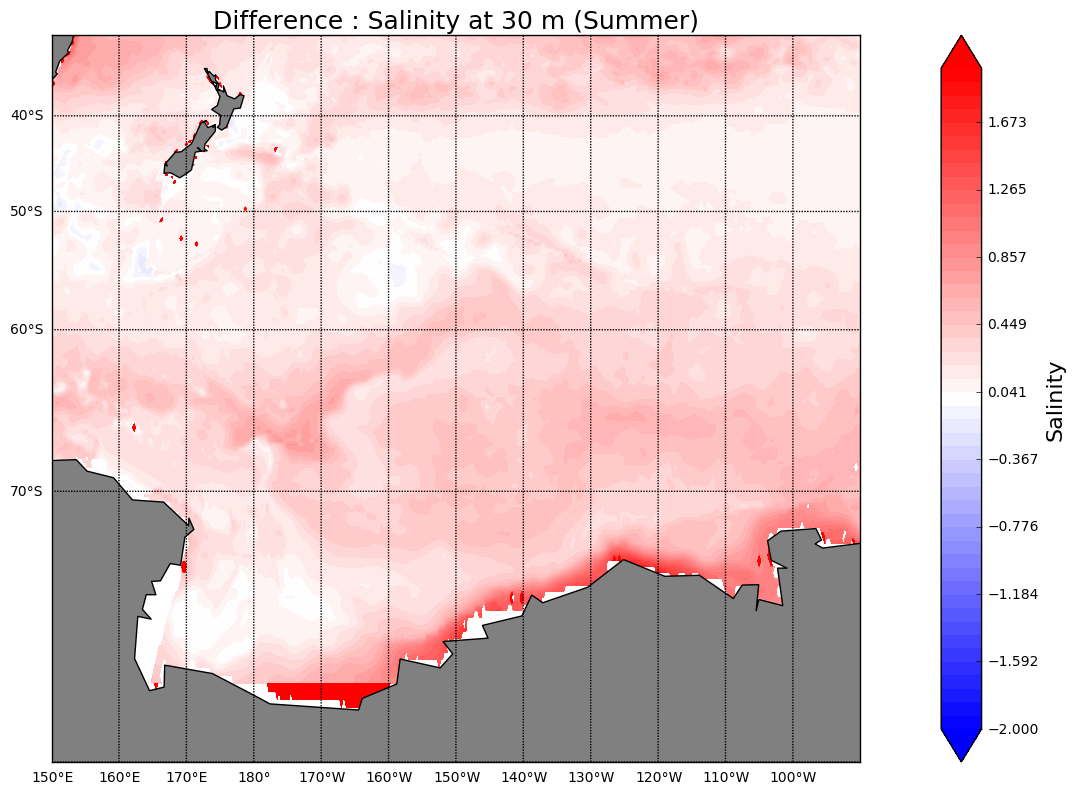

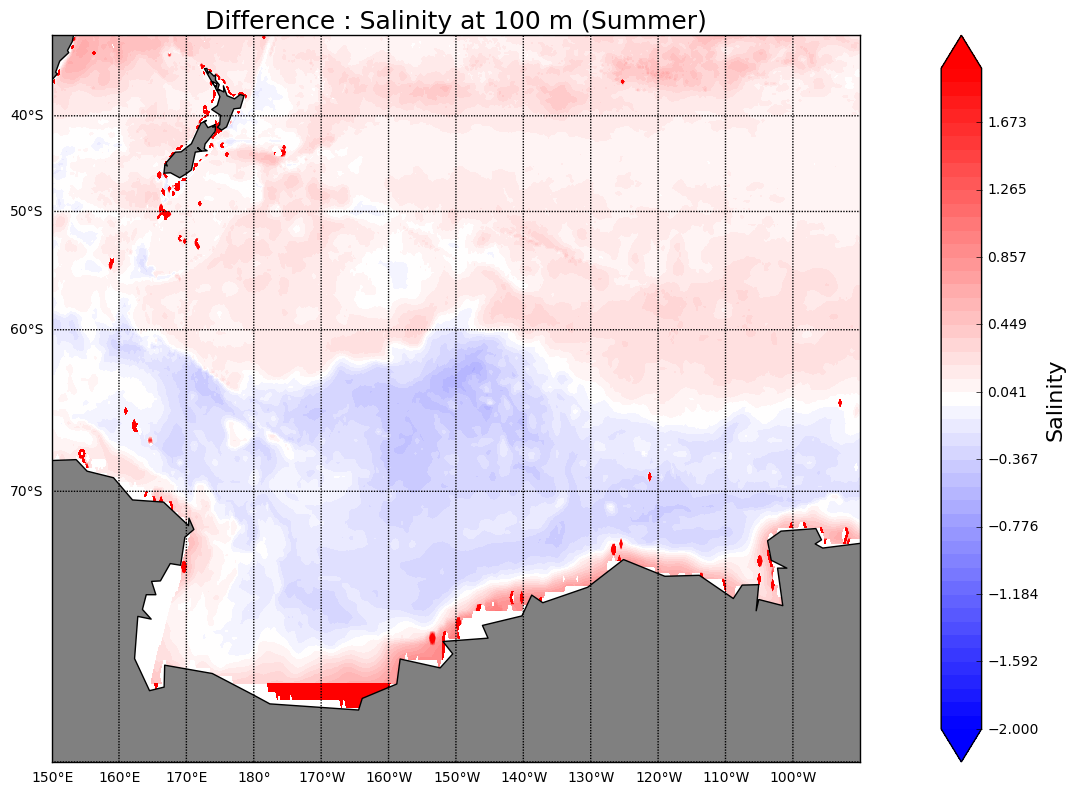

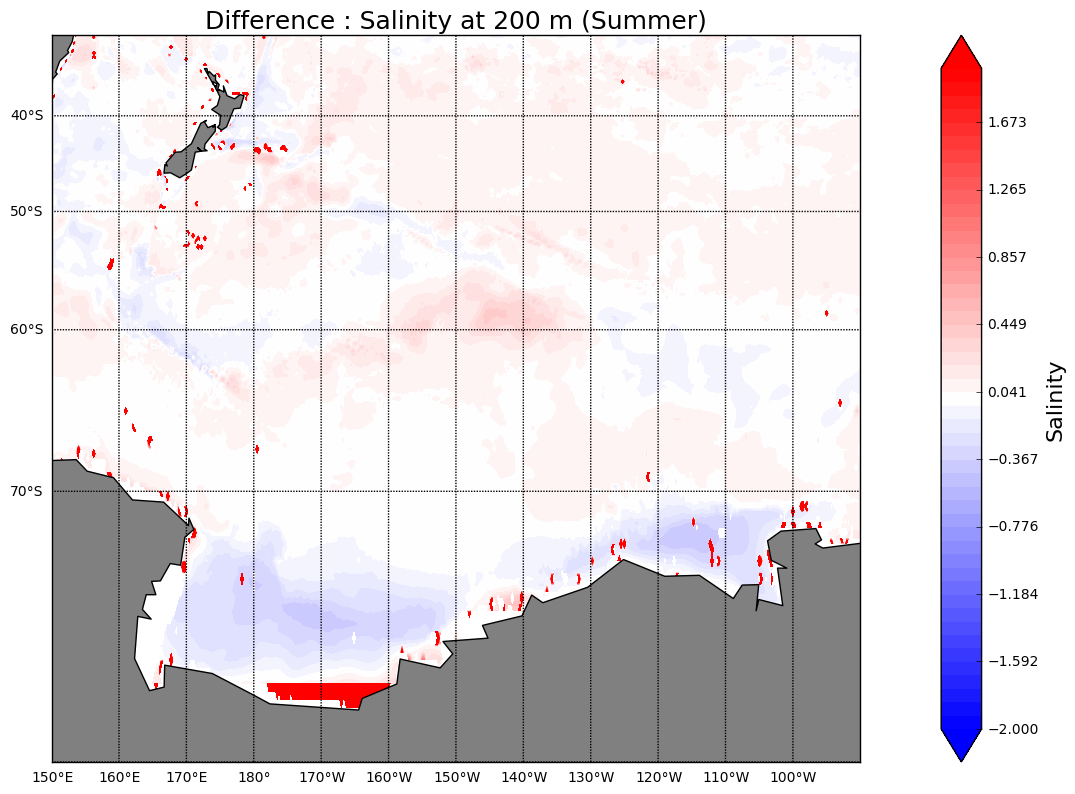

In [55]:
seasonal_diff(1, 1, np.linspace(-2,2,50), 'salinity', 6,   'mean_Salt_30_DJF', 'Difference : Salinity at 30 m (Winter)', 'Salinity', plt.cm.bwr, plot_path,    'Diff_Winter_merc_S_30.png')
seasonal_diff(1, 1, np.linspace(-2,2,50), 'salinity', 12, 'mean_Salt_100_DJF', 'Difference : Salinity at 100 m (Winter)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Winter_merc_S_100.png')
seasonal_diff(1, 1, np.linspace(-2,2,50), 'salinity', 16, 'mean_Salt_200_DJF', 'Difference : Salinity at 200 m (Winter)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Winter_merc_S_200.png')

seasonal_diff(0, 1, np.linspace(-2,2,50), 'salinity', 6,   'mean_Salt_30_JJA', 'Difference : Salinity at 30 m (Summer)', 'Salinity', plt.cm.bwr, plot_path,    'Diff_Summer_merc_S_30.png')
seasonal_diff(0, 1, np.linspace(-2,2,50), 'salinity', 12, 'mean_Salt_100_JJA', 'Difference : Salinity at 100 m (Summer)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Summer_merc_S_100.png')
seasonal_diff(0, 1, np.linspace(-2,2,50), 'salinity', 16, 'mean_Salt_200_JJA', 'Difference : Salinity at 200 m (Summer)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Summer_merc_S_200.png')

## Lambert

In [ ]:
seasonal_diff(1, 0, np.linspace(-2,2,50), 'salinity', 6, 'mean_Salt_30_DJF',   'Difference : Salinity at 30 m (Winter)', 'Salinity', plt.cm.bwr, plot_path,  'Diff_Winter_lamb_S_30.png')
seasonal_diff(1, 0, np.linspace(-2,2,50), 'salinity', 12, 'mean_Salt_100_DJF', 'Difference : Salinity at 100 m (Winter)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Winter_lamb_S_100.png')
seasonal_diff(1, 0, np.linspace(-2,2,50), 'salinity', 16, 'mean_Salt_200_DJF', 'Difference : Salinity at 200 m (Winter)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Winter_lamb_S_200.png')

seasonal_diff(0, 0, np.linspace(-2,2,50), 'salinity', 6, 'mean_Salt_30_JJA',   'Difference : Salinity at 30 m (Summer)', 'Salinity', plt.cm.bwr, plot_path,  'Diff_Summer_lamb_S_30.png')
seasonal_diff(0, 0, np.linspace(-2,2,50), 'salinity', 12, 'mean_Salt_100_JJA', 'Difference : Salinity at 100 m (Summer)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Summer_lamb_S_100.png')
seasonal_diff(0, 0, np.linspace(-2,2,50), 'salinity', 16, 'mean_Salt_200_JJA', 'Difference : Salinity at 200 m (Summer)', 'Salinity', plt.cm.bwr, plot_path, 'Diff_Summer_lamb_S_200.png')

***

# Gradients

In [14]:
def grad_climatology(lat_n, lon_n, nb_subplt):
    
    lon = lon_n*4+720
    lat = (lat_n+80)*4
    
    T1   = file1.variables['salinity'][:,:,lat,lon]
    T2   = file2.variables['salinity'][:,:,lat,lon]
    T3   = file3.variables['salinity'][:,:,lat,lon]
    T4   = file4.variables['salinity'][:,:,lat,lon]
    T5   = file5.variables['salinity'][:,:,lat,lon]
    T6   = file6.variables['salinity'][:,:,lat,lon]
    T7   = file7.variables['salinity'][:,:,lat,lon]
    T8   = file8.variables['salinity'][:,:,lat,lon]
    T9   = file9.variables['salinity'][:,:,lat,lon]
    T10 = file10.variables['salinity'][:,:,lat,lon]
    T11 = file11.variables['salinity'][:,:,lat,lon]
    T12 = file12.variables['salinity'][:,:,lat,lon]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12
    
    plt.subplot(6,3,nb_subplt)
    plt.plot(T, depth)
    plt.title('Climatology data : Salinity profile at lat = '+ str(lat_n) + ' and lon = ' + str(lon_n), fontsize=9)#, loc='left')
    plt.xlabel('Salinity', fontsize=6)
    plt.ylabel('Depth [m]', fontsize=6)
    plt.gca().invert_yaxis() #gca : get current axis
    #plt.savefig(plot_path + 'T_150.png', bbox_inches='tight')

In [15]:
nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
z = nc.variables['depth'][:]

def grad_model(mean_Field, lat, lat_title, lon_title, T_or_S, t_or_s, nb_subplt):
    
    field = pickle_load(mean_Field, '/data/ebent')
    field=field[:,lat]
    plt.subplot(6,3,nb_subplt)
    plt.plot(field, z)
    plt.title('Model : '+ str(T_or_S) + ' profile at lat = '+ str(lat_title) + ' and lon = ' + str(lon_title), fontsize=9)#, loc='left')
    plt.xlabel(str(t_or_s), fontsize=6)
    plt.ylabel('Depth [m]', fontsize=6)
    plt.gca().invert_yaxis() #gca : get current axis

In [16]:
def grad_diff(lat_n, lon_n, mean_Field, ind, nb_subplt):
    
    lon = lon_n*4+720
    LAT = (lat_n+80)*4
    
    T1   = file1.variables['salinity'][:,:,LAT,lon]
    T2   = file2.variables['salinity'][:,:,LAT,lon]
    T3   = file3.variables['salinity'][:,:,LAT,lon]
    T4   = file4.variables['salinity'][:,:,LAT,lon]
    T5   = file5.variables['salinity'][:,:,LAT,lon]
    T6   = file6.variables['salinity'][:,:,LAT,lon]
    T7   = file7.variables['salinity'][:,:,LAT,lon]
    T8   = file8.variables['salinity'][:,:,LAT,lon]
    T9   = file9.variables['salinity'][:,:,LAT,lon]
    T10 = file10.variables['salinity'][:,:,LAT,lon]
    T11 = file11.variables['salinity'][:,:,LAT,lon]
    T12 = file12.variables['salinity'][:,:,LAT,lon]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12
    
    mean_Field = pickle_load(mean_Field, '/data/ebent')
    mean_Field = mean_Field[:,ind]
    minimum = mean_Field.min()
    nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
    z = nc.variables['depth'][:]
    mean_Field=mean_Field[::-1]
    z=z[::-1]
    mean_Field = interpolate.interp1d(z, mean_Field, bounds_error=False)(depth)
    mean_Field = np.ma.masked_where(mean_Field==0., mean_Field)
    mean_Field = np.ma.masked_where(np.isnan(mean_Field), mean_Field)
    mean_Field = np.ma.masked_where(mean_Field<minimum, mean_Field)
    mean_Field = np.ma.masked_where(T.mask==True, mean_Field)
    T = np.ma.masked_where(mean_Field.mask==True, T)

    diff = T-mean_Field
    
    plt.subplot(6,3,nb_subplt)
    plt.plot(diff, depth)
    plt.title('Difference : Salinity profile at lat = '+ str(lat_n) + ' and lon = ' + str(lon_n), fontsize=9)#, loc='left')
    plt.xlabel('Salinity', fontsize=6)
    plt.ylabel('Depth [m]', fontsize=6)
    plt.gca().invert_yaxis() #gca : get current axis
    #plt.savefig(plot_path + 'T_150.png', bbox_inches='tight')

In [17]:
nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
z = nc.variables['depth'][:]

def grad_both(field, lat, lat_title, lon_title, T_or_S, t_or_s, lat_n, lon_n, nb_subplt):
    
    #model
    field = pickle_load(field, '/data/ebent')
    field=field[:,lat]
    minimum = field.min()
    #plt.subplot(2,2,nb_subplt)
    #plt.title('Model : '+ str(T_or_S) + ' profile at lat = '+ str(lat_title) + ' and lon = ' + str(lon_title), fontsize=9)#, loc='left')
    #plt.xlabel(str(t_or_s), fontsize=6)
    #plt.ylabel('Depth [m]', fontsize=6)
    #plt.gca().invert_yaxis() #gca : get current axis
    
    #climatology
    lon = lon_n*4+720
    lat = (lat_n+80)*4
    
    T1   = file1.variables['salinity'][:,:,lat,lon]
    T2   = file2.variables['salinity'][:,:,lat,lon]
    T3   = file3.variables['salinity'][:,:,lat,lon]
    T4   = file4.variables['salinity'][:,:,lat,lon]
    T5   = file5.variables['salinity'][:,:,lat,lon]
    T6   = file6.variables['salinity'][:,:,lat,lon]
    T7   = file7.variables['salinity'][:,:,lat,lon]
    T8   = file8.variables['salinity'][:,:,lat,lon]
    T9   = file9.variables['salinity'][:,:,lat,lon]
    T10 = file10.variables['salinity'][:,:,lat,lon]
    T11 = file11.variables['salinity'][:,:,lat,lon]
    T12 = file12.variables['salinity'][:,:,lat,lon]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12
    
    field = interpolate.interp1d(z, field, bounds_error=False)(depth)
    field = np.ma.masked_where(field==0., field)
    field = np.ma.masked_where(np.isnan(field), field)
    field = np.ma.masked_where(field<minimum, field)
    field = np.ma.masked_where(T.mask==True, field)
    T = np.ma.masked_where(field.mask==True, T)
    
    #plt.figure(figsize=(15,30), dpi=300)
    plt.subplot(6,3,nb_subplt)
    plt.plot(field, depth, label='Model')
    plt.plot(T, depth, label='Climatology')
    plt.legend(loc='lower left', fontsize=10)
    plt.title('Salinity profile at lat = '+ str(lat_n) + ' and lon = ' + str(lon_n), fontsize=9)#, loc='left')
    plt.xlabel('Salinity', fontsize=6)
    plt.ylabel('Depth [m]', fontsize=6)
    plt.gca().invert_yaxis()

# Figures

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')


/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in less


('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')


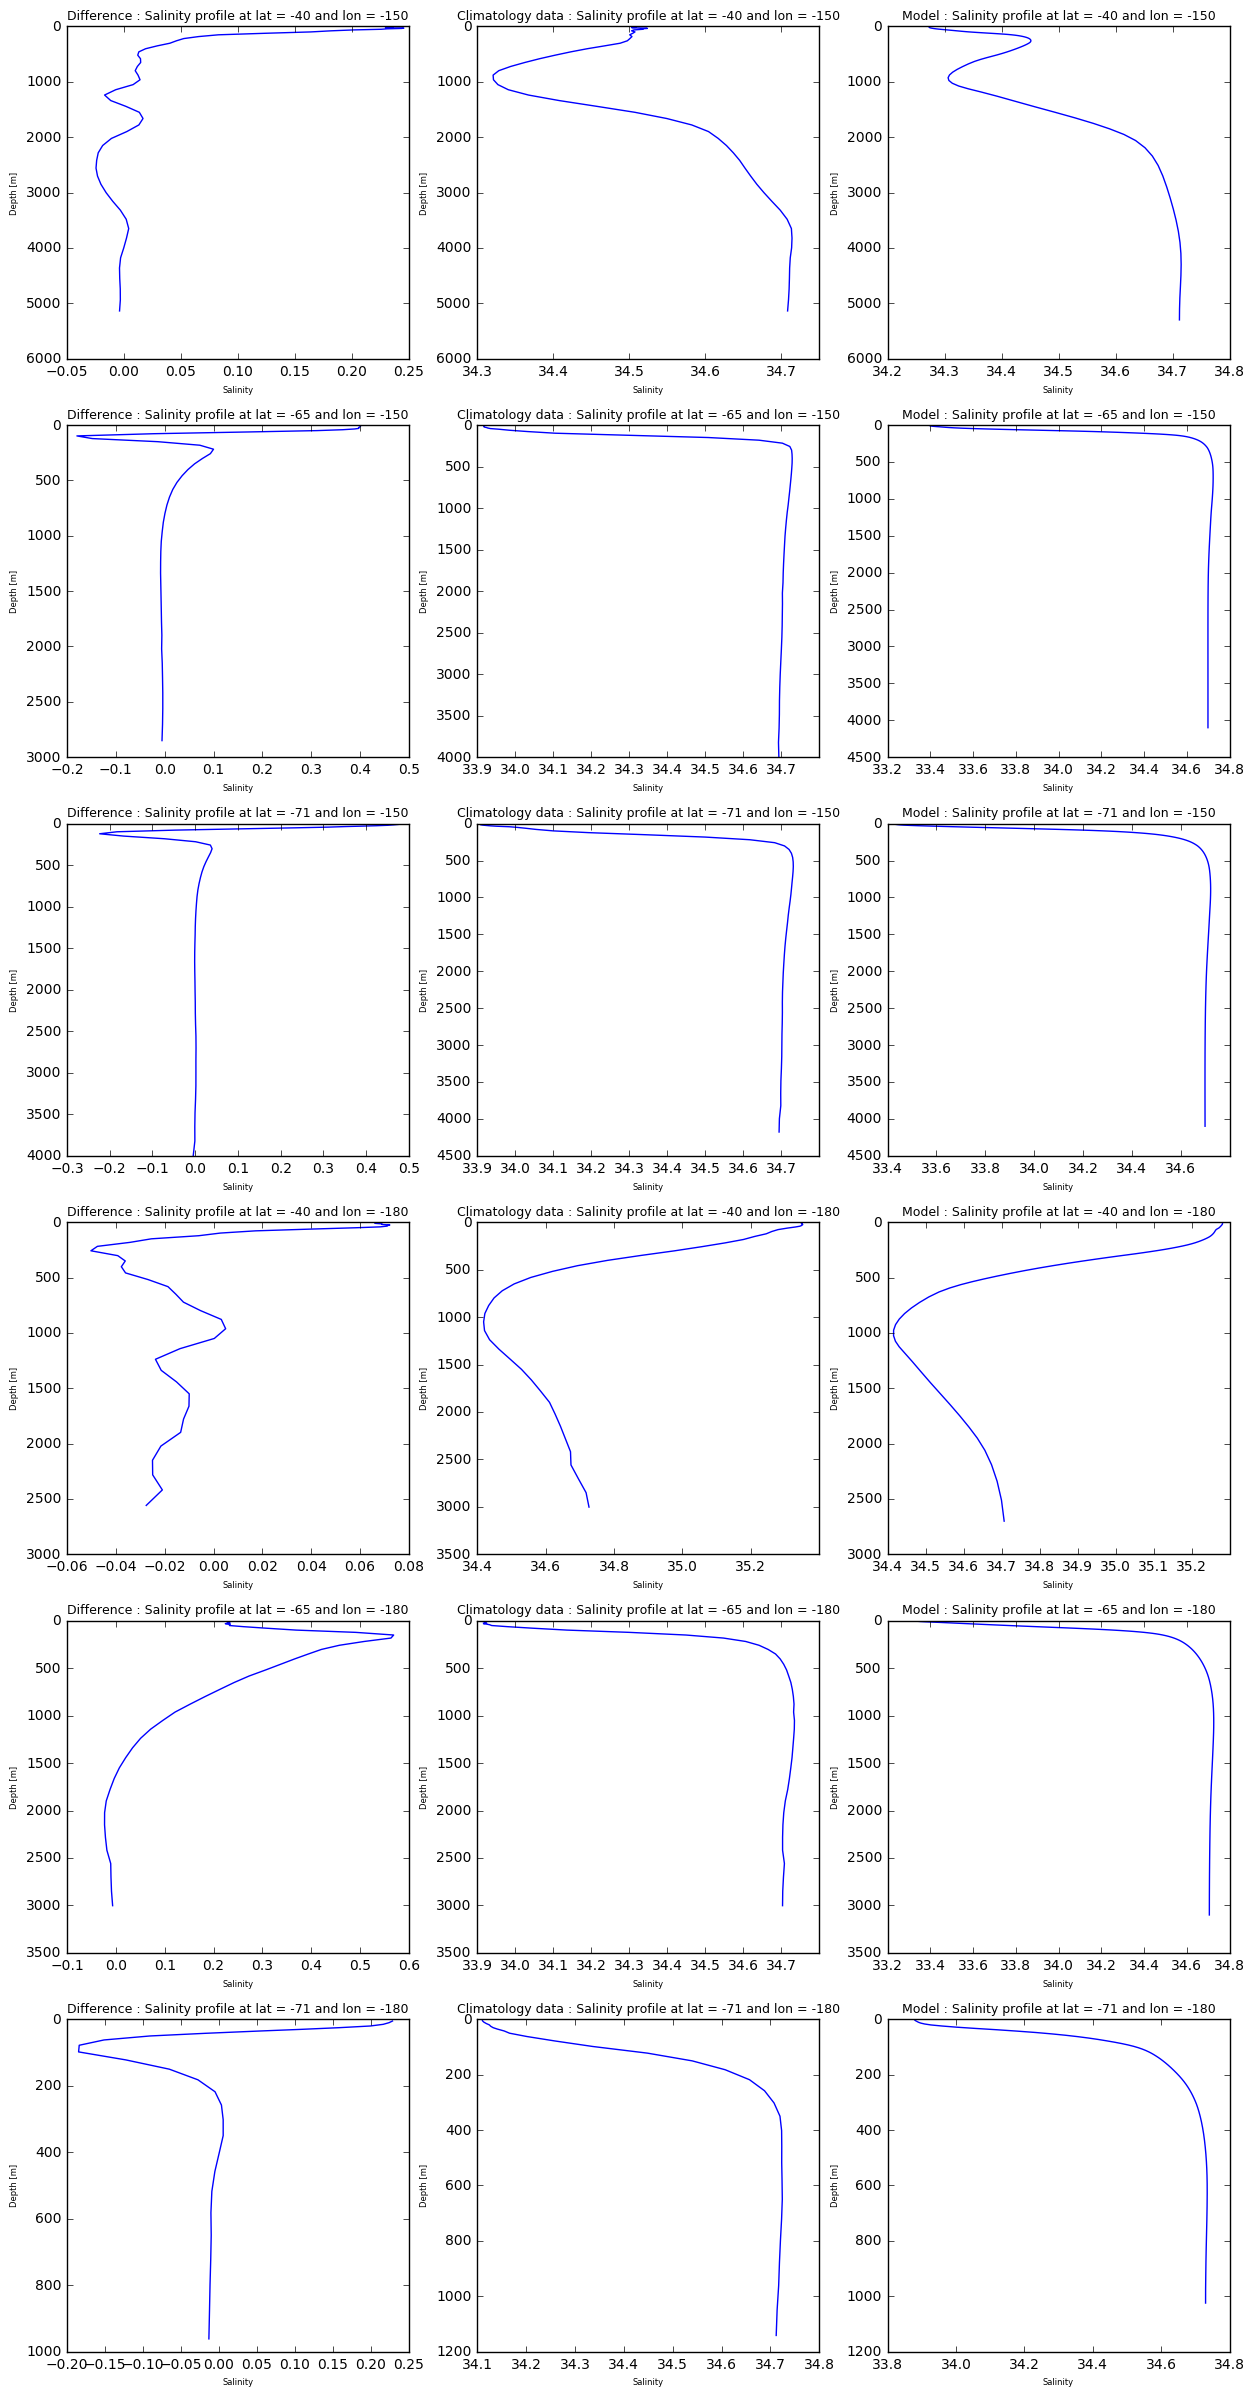

In [24]:
plt.figure(figsize=(15,30), dpi=300)

# 150W
grad_diff(-40, -150, 'mean_Salt_150W', 1023,1)
grad_diff(-65, -150, 'mean_Salt_150W', 642, 4)
grad_diff(-71, -150, 'mean_Salt_150W', 319, 7)

# 180Wlt
grad_diff(-40, -180, 'mean_Salt_180W', 1023, 10)
grad_diff(-65, -180, 'mean_Salt_180W', 642, 13)
grad_diff(-71, -180, 'mean_Salt_180W', 319, 16)

# 150W
grad_climatology(-40, -150, 2)
grad_climatology(-65, -150, 5)
grad_climatology(-71, -150, 8)

# 180W
grad_climatology(-40, -180, 11)
grad_climatology(-65, -180, 14)
grad_climatology(-71, -180, 17)

# 150W
grad_model('mean_Salt_150W', 1023, '-40', '-150', 'Salinity', 'Salinity', 3)
grad_model('mean_Salt_150W', 512, '-65',  '-150', 'Salinity', 'Salinity', 6)
grad_model('mean_Salt_150W', 319, '-71',  '-150', 'Salinity', 'Salinity', 9)

# 180W
grad_model('mean_Salt_180W', 1023, '-40', '-180','Salinity', 'Salinity', 12)
grad_model('mean_Salt_180W', 512, '-65', '-180', 'Salinity', 'Salinity', 15)
grad_model('mean_Salt_180W', 319, '-71', '-180', 'Salinity', 'Salinity', 18)

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')


/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in less


('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')


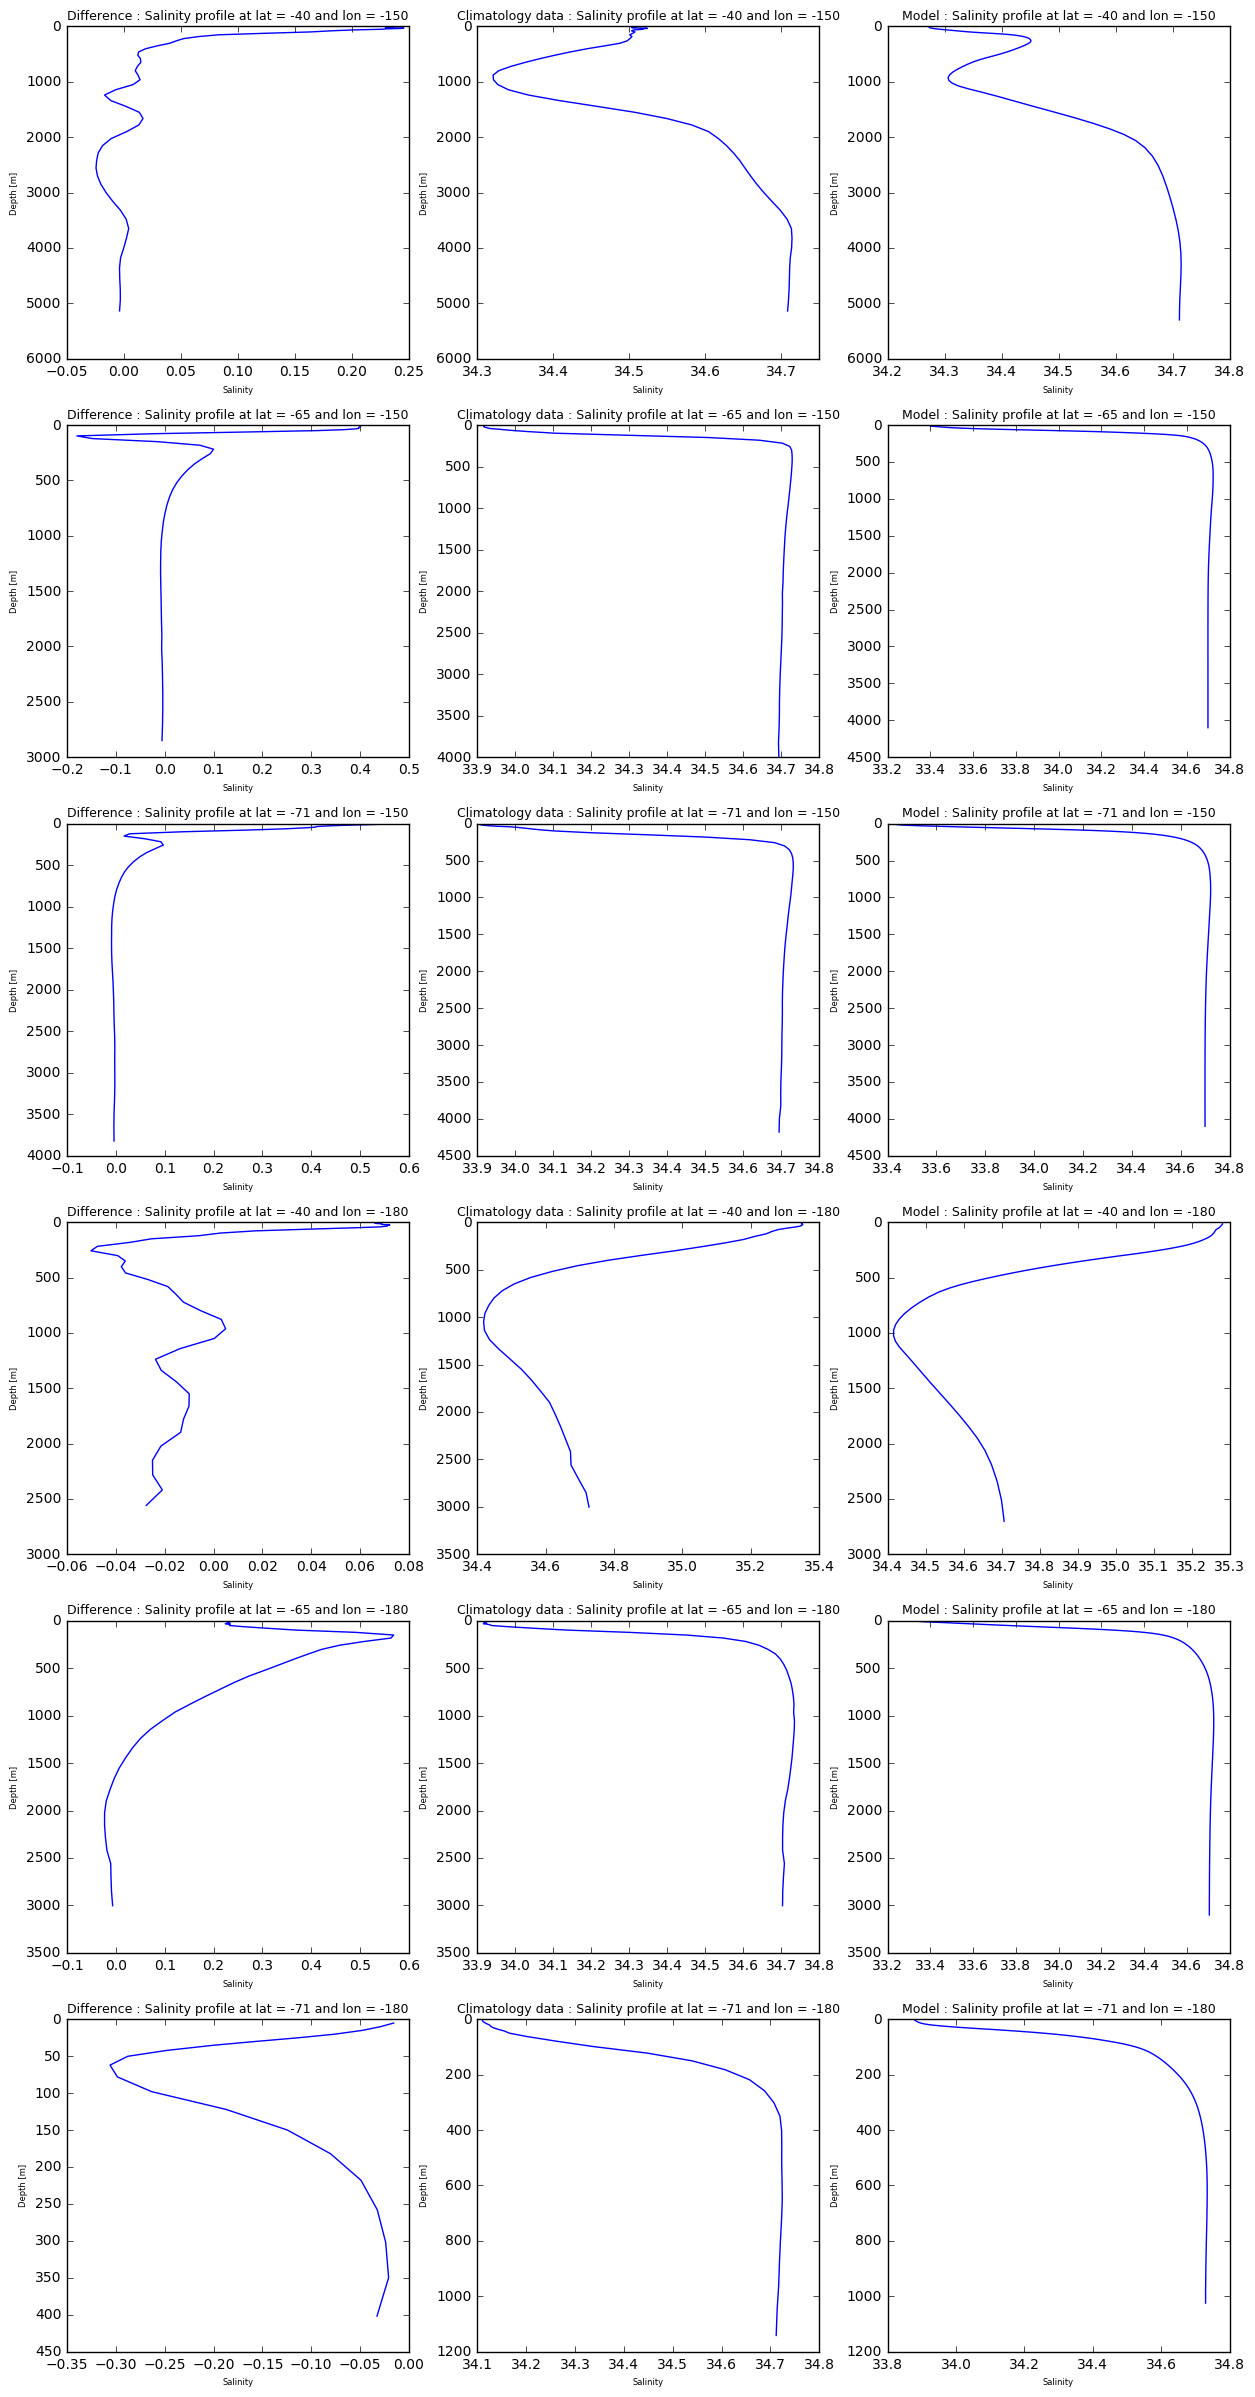

In [241]:
plt.figure(figsize=(15,30), dpi=300)

# 150W
grad_diff(-40, -150, 'mean_Salt_150W', 1023,1)
grad_diff(-65, -150, 'mean_Salt_150W', 642, 4)
grad_diff(-71, -150, 'mean_Salt_150W', 154, 7)

# 180Wlt
grad_diff(-40, -180, 'mean_Salt_180W', 1023, 10)
grad_diff(-65, -180, 'mean_Salt_180W', 642, 13)
grad_diff(-71, -180, 'mean_Salt_180W', 154, 16)

# 150W
grad_climatology(-40, -150, 2)
grad_climatology(-65, -150, 5)
grad_climatology(-71, -150, 8)

# 180W
grad_climatology(-40, -180, 11)
grad_climatology(-65, -180, 14)
grad_climatology(-71, -180, 17)

# 150W
grad_model('mean_Salt_150W', 1023, '-40', '-150', 'Salinity', 'Salinity', 3)
grad_model('mean_Salt_150W', 512, '-65',  '-150', 'Salinity', 'Salinity', 6)
grad_model('mean_Salt_150W', 319, '-71',  '-150', 'Salinity', 'Salinity', 9)

# 180W
grad_model('mean_Salt_180W', 1023, '-40', '-180','Salinity', 'Salinity', 12)
grad_model('mean_Salt_180W', 512, '-65', '-180', 'Salinity', 'Salinity', 15)
grad_model('mean_Salt_180W', 319, '-71', '-180', 'Salinity', 'Salinity', 18)

## To test where are the lats

In [18]:
lon_n = -150
lat_n = -40
lon = lon_n*4+720
LAT = (lat_n+80)*4
print lon, LAT    

120 160


In [19]:
Lon = file1.variables['longitude'][:]
Lat = file1.variables['latitude'][:200]

In [21]:
print Lon[lon]
Lat[LAT]

-150.0


-40.0

In [25]:
nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
z = nc.variables['depth'][:]
lat_min = 0
lat_max = 1170

lat = nc.variables['lat'][lat_min:lat_max]

***

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')


/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in less


('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')


/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in less


('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')


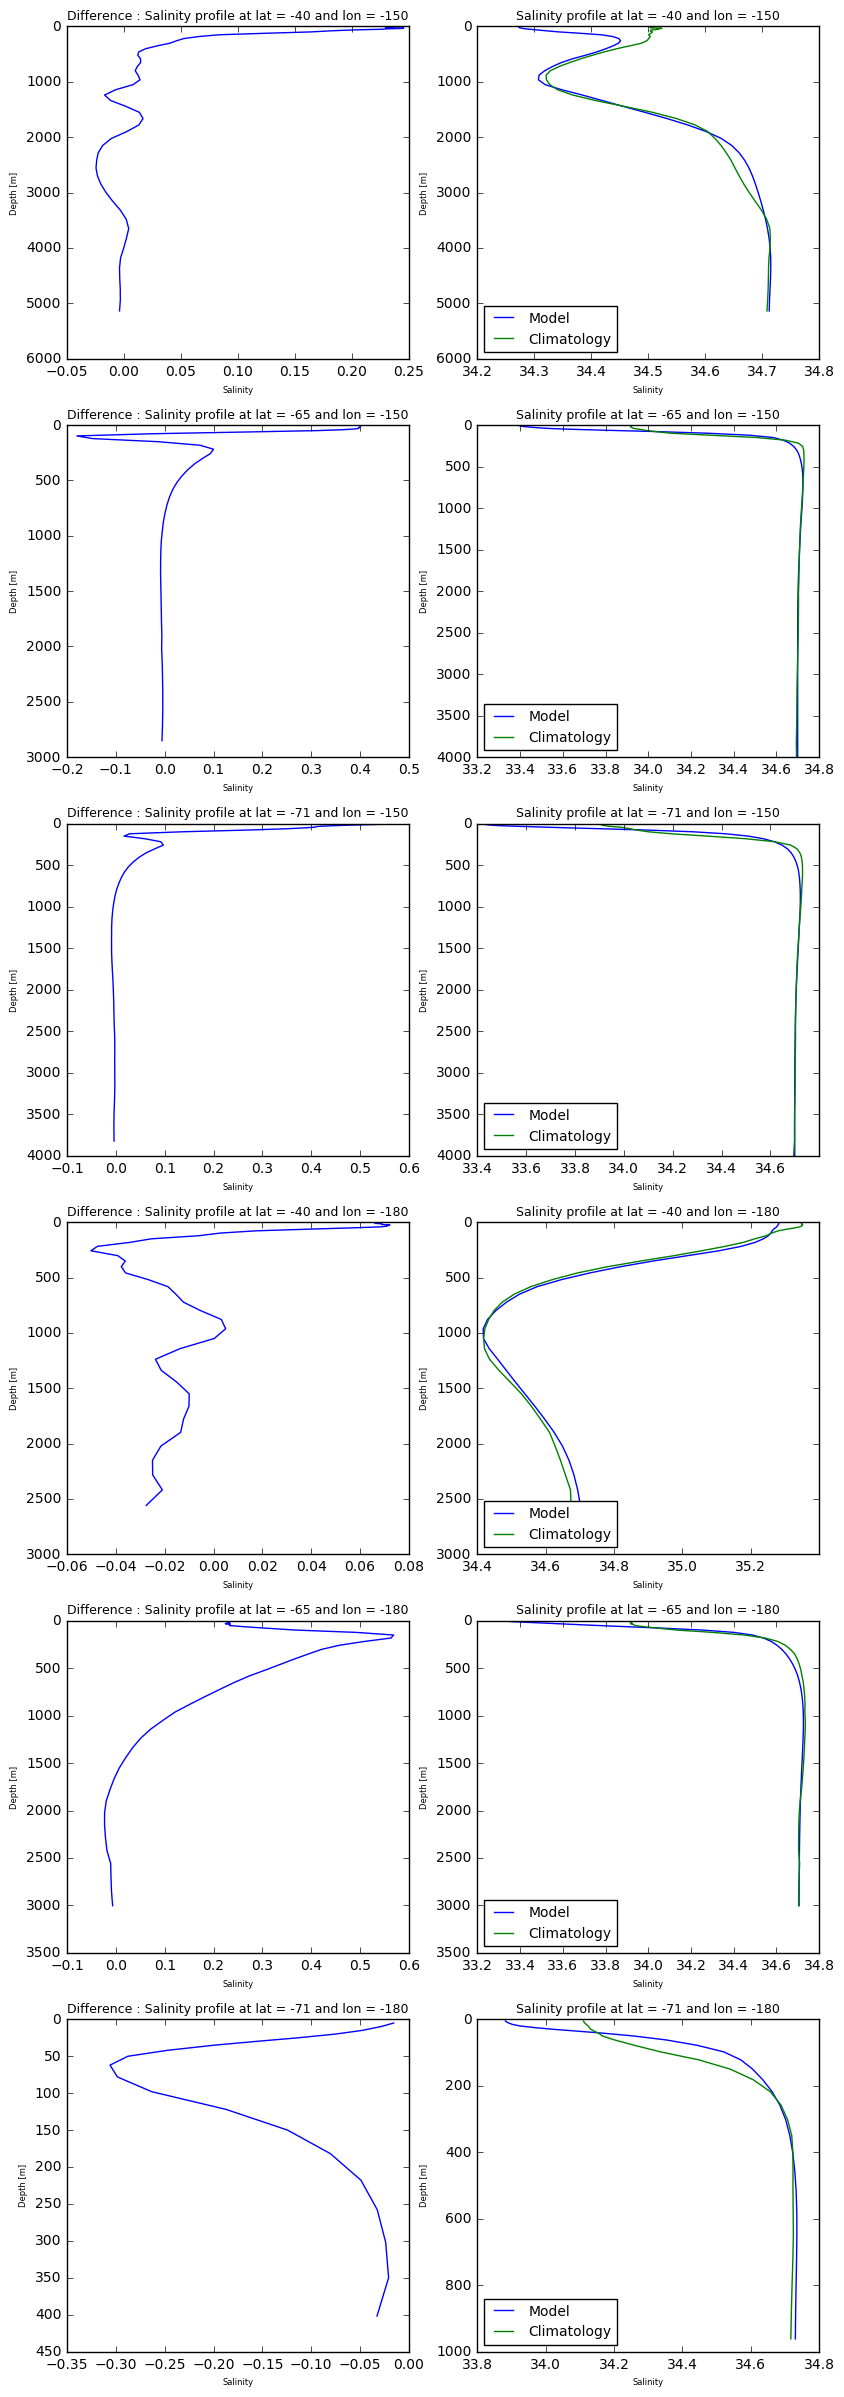

In [24]:
plt.figure(figsize=(15,30), dpi=300)

# 150W
grad_diff(-40, -150, 'mean_Salt_150W', 1023,1)
grad_diff(-65, -150, 'mean_Salt_150W', 642, 4)
grad_diff(-71, -150, 'mean_Salt_150W', 154, 7)

# 180Wlt
grad_diff(-40, -180, 'mean_Salt_180W', 1023, 10)
grad_diff(-65, -180, 'mean_Salt_180W', 642, 13)
grad_diff(-71, -180, 'mean_Salt_180W', 154, 16)

#150
grad_both('mean_Salt_150W', 1023, '-40', '-150', 'Salinity', 'Salinity', -40, -150, 2)
grad_both('mean_Salt_150W', 512, '-65',  '-150', 'Salinity', 'Salinity', -65, -150, 5)
grad_both('mean_Salt_150W', 319, '-71',  '-150', 'Salinity', 'Salinity', -71, -150, 8)
# 180W
grad_both('mean_Salt_180W', 1023, '-40', '-180','Salinity', 'Salinity', -40, -180, 11)
grad_both('mean_Salt_180W', 512, '-65', '-180', 'Salinity', 'Salinity', -65, -180, 14)
grad_both('mean_Salt_180W', 319, '-71', '-180', 'Salinity', 'Salinity', -71, -180, 17)

In [120]:
def grad_diff(lat_n, lon_n, mean_Field, ind, nb_subplt):
    
    lon = lon_n*4+720
    LAT = (lat_n+80)*4
    
    T1   = file1.variables['salinity'][:,:,LAT,lon]
    T2   = file2.variables['salinity'][:,:,LAT,lon]
    T3   = file3.variables['salinity'][:,:,LAT,lon]
    T4   = file4.variables['salinity'][:,:,LAT,lon]
    T5   = file5.variables['salinity'][:,:,LAT,lon]
    T6   = file6.variables['salinity'][:,:,LAT,lon]
    T7   = file7.variables['salinity'][:,:,LAT,lon]
    T8   = file8.variables['salinity'][:,:,LAT,lon]
    T9   = file9.variables['salinity'][:,:,LAT,lon]
    T10 = file10.variables['salinity'][:,:,LAT,lon]
    T11 = file11.variables['salinity'][:,:,LAT,lon]
    T12 = file12.variables['salinity'][:,:,LAT,lon]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12

    mean_Field = pickle_load(mean_Field, '/data/ebent')
    mean_Field = mean_Field[:,ind]
    minimum = mean_Field.min()
    nc = Dataset(load_path2+'so12_i0_year2006_5day_Theta.nc','r')
    z = nc.variables['depth'][:]
    mean_Field=mean_Field[::-1]
    z=z[::-1]
    
    mean_Field = np.ma.masked_where(mean_Field==0., mean_Field)
    mean_Field = np.ma.masked_where(np.isnan(mean_Field), mean_Field)
    print 'MIN :'
    print mean_Field.min()
    print 'last ones :'
    print mean_Field[-10:-1]
    print ''
    
    mean_Field = interpolate.interp1d(z, mean_Field, bounds_error=False)(depth)
    #mean_Field = np.ma.masked_where(np.isnan(mean_Field), mean_Field)
    #mean_Field = np.ma.masked_where(mean_Field==0., mean_Field)
    #mean_Field = np.ma.masked_where(mean_Field<minimum, mean_Field)

    print('MIN :')
    print mean_Field.min() 
    print mean_Field[-10:-1]
    print ''
    
    
    mean_Field = np.ma.masked_where(T.mask==True, mean_Field)
    T = np.ma.masked_where(mean_Field.mask==True, T)

    diff = T-mean_Field
    print diff[-10:-1]
    
    plt.subplot(6,3,nb_subplt)
    plt.plot(diff, depth)
    plt.title('Difference : Salinity profile at lat = '+ str(lat_n) + ' and lon = ' + str(lon_n), fontsize=9)#, loc='left')
    plt.xlabel('Salinity', fontsize=6)
    plt.ylabel('Depth [m]', fontsize=6)
    plt.gca().invert_yaxis() #gca : get current axis
    #plt.savefig(plot_path + 'T_150.png', bbox_inches='tight')

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
mean_Field==0
[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
MIN :
33.5146940363
last ones :
[33.52468877993692 33.52153181870774 33.51973917082197 33.51854660161985
 33.517656642954535 33.516989831151044 33.51646045758768 33.515985731480235
 33.515458932549755]

mean_Field==0
[False False False False False False False False False False False False
 False False False False False False False False False 

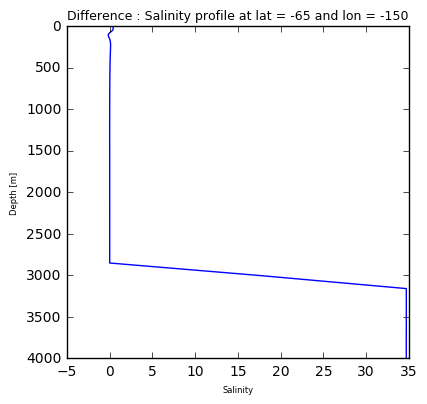

In [121]:
plt.figure(figsize=(15,30), dpi=300)

grad_diff(-65, -150, 'mean_Salt_150W', 642, 4)

In [83]:
a=np.array([4,50,np.nan,77,88])

In [84]:
bt=np.arange(len(a))

In [85]:
bt

array([0, 1, 2, 3, 4])

In [86]:
a=np.array([4,50,np.nan,77,88])
w=np.isnan(a)
a[w]=0

In [88]:
a

array([  4.,  50.,   0.,  77.,  88.])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False -- -- -- -- --
 -- --]
34.3208

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
[-- -- -- False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False

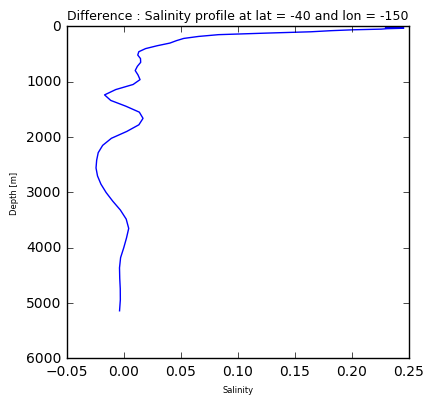

In [78]:
plt.figure(figsize=(15,30), dpi=300)

grad_diff(-40, -150, 'mean_Salt_150W', 1023, 4)

('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_150W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')
('loaded from : ', '/data/ebent/mean_Salt_180W.npy')


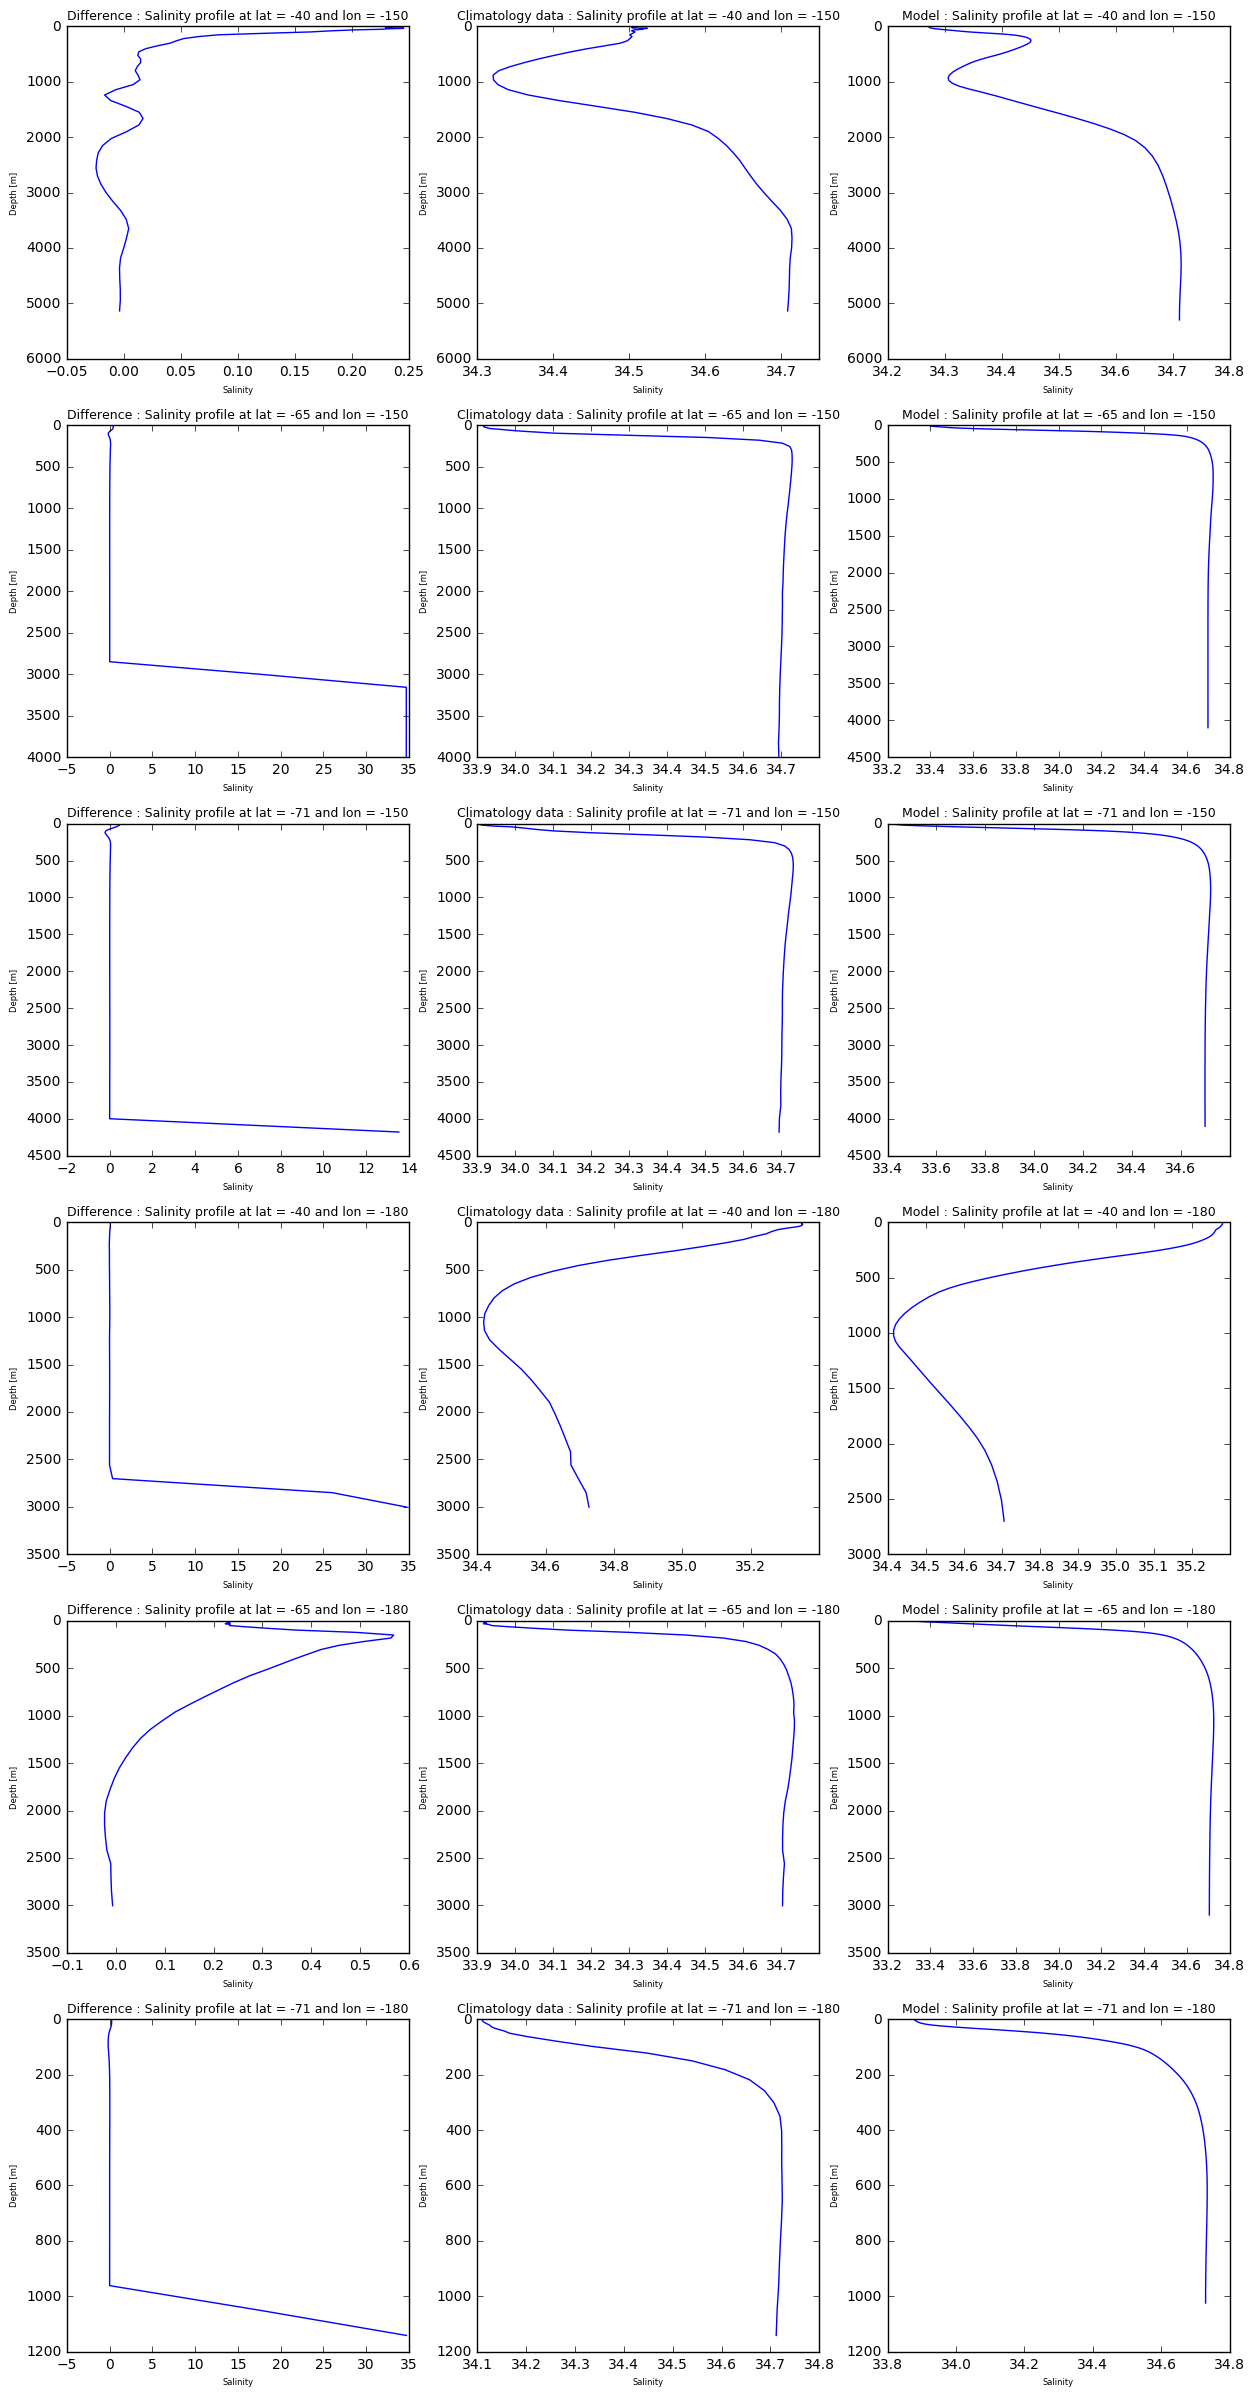

In [28]:
plt.figure(figsize=(15,30), dpi=300)

# 150W
grad_diff(-40, -150, 'mean_Salt_150W', 1023,1)
grad_diff(-65, -150, 'mean_Salt_150W', 642, 4)
grad_diff(-71, -150, 'mean_Salt_150W', 319, 7)

# 180Wlt
grad_diff(-40, -180, 'mean_Salt_180W', 1023, 10)
grad_diff(-65, -180, 'mean_Salt_180W', 642, 13)
grad_diff(-71, -180, 'mean_Salt_180W', 319, 16)

# 150W
grad_climatology(-40, -150, 2)
grad_climatology(-65, -150, 5)
grad_climatology(-71, -150, 8)

# 180W
grad_climatology(-40, -180, 11)
grad_climatology(-65, -180, 14)
grad_climatology(-71, -180, 17)

# 150W
grad_model('mean_Salt_150W', 1023, '-40', '-150', 'Salinity', 'Salinity', 3)
grad_model('mean_Salt_150W', 512, '-65',  '-150', 'Salinity', 'Salinity', 6)
grad_model('mean_Salt_150W', 319, '-71',  '-150', 'Salinity', 'Salinity', 9)

# 180W
grad_model('mean_Salt_180W', 1023, '-40', '-180','Salinity', 'Salinity', 12)
grad_model('mean_Salt_180W', 512, '-65', '-180', 'Salinity', 'Salinity', 15)
grad_model('mean_Salt_180W', 319, '-71', '-180', 'Salinity', 'Salinity', 18)